In [1]:
import pandas as pd
import numpy as np

# Data Preprocessing

In [66]:
industry_df = pd.read_csv("./data/업종거래소.csv", header = [0,1], index_col = 0)
industry_df = industry_df.xs('거래소 업종 (세부분류)', level=1, axis=1)
industry_df.dropna(how = 'all', inplace= True)
industry_df
financial_industries = [
    '금융',
    '코스피 금융업',
    '코스피 보험',
    '코스피 증권',
    '코스피 은행',
]

filter_df = industry_df.iloc[-1]
columns_to_remove = list(filter_df[filter_df.isin(financial_industries)].index)
#industry_df = industry_df.drop(columns=columns_to_remove)
price_df = pd.read_csv("./data/수정주가.csv", thousands= ',', index_col = 0)
price_df = price_df.drop(columns=columns_to_remove)
price_df.index = pd.to_datetime(price_df.index)
price_df.index.name = 'Date'
price_df

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,POSCO홀딩스,NAVER,삼성SDI,...,에스앤씨엔진그룹,차이나하오란,웨이포트,성융광전투자,완리,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SNK
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-03,429,NaN,NaN,NaN,17203,NaN,199967,28303,NaN,21602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,434,NaN,NaN,NaN,17439,NaN,203091,28756,NaN,21697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,425,NaN,NaN,NaN,17085,NaN,199967,28484,NaN,20985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-06,426,NaN,NaN,NaN,17027,NaN,198405,28847,NaN,21127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,422,NaN,NaN,NaN,17262,NaN,201529,28938,NaN,21127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,76100,179600.0,378000.0,962000.0,249500,205000.0,102800,345000,170700.0,332000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-27,75800,175000.0,376500.0,973000.0,247500,200500.0,101800,346000,167900.0,338000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-28,76400,179300.0,368500.0,991000.0,259000,201500.0,104600,336500,163800.0,339500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
returns_df = price_df.pct_change(1)
returns_df

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,POSCO홀딩스,NAVER,삼성SDI,...,에스앤씨엔진그룹,차이나하오란,웨이포트,성융광전투자,완리,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SNK
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,0.011655,NaN,NaN,NaN,0.013719,NaN,0.015623,0.016005,NaN,0.004398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-0.020737,NaN,NaN,NaN,-0.020299,NaN,-0.015382,-0.009459,NaN,-0.032816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-06,0.002353,NaN,NaN,NaN,-0.003395,NaN,-0.007811,0.012744,NaN,0.006767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,-0.009390,NaN,NaN,NaN,0.013802,NaN,0.015746,0.003155,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,-0.020592,-0.031806,0.052925,0.005225,-0.011881,0.012346,-0.011538,0.014706,0.035173,0.004539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-08-27,-0.003942,-0.025612,-0.003968,0.011435,-0.008016,-0.021951,-0.009728,0.002899,-0.016403,0.018072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-08-28,0.007916,0.024571,-0.021248,0.018499,0.046465,0.004988,0.027505,-0.027457,-0.024419,0.004438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
columns_to_remove

['KB금융',
 '신한지주',
 '삼성생명',
 '메리츠금융지주',
 '하나금융지주',
 '삼성화재',
 'LG',
 'HD한국조선해양',
 '우리금융지주',
 '기업은행',
 'SK',
 'SK스퀘어',
 '에코프로',
 '카카오뱅크',
 'DB손해보험',
 'HD현대',
 '미래에셋증권',
 '삼성카드',
 '한진칼',
 'NH투자증권',
 '삼성증권',
 'GS',
 '한국금융지주',
 'CJ',
 '키움증권',
 'LS',
 '카카오페이',
 'BNK금융지주',
 'JB금융지주',
 '현대해상',
 '두산',
 '롯데지주',
 '한화생명',
 '한미사이언스',
 '한국앤컴퍼니',
 '코리안리',
 'DGB금융지주',
 'OCI홀딩스',
 '신영증권',
 '영원무역홀딩스',
 '동원산업',
 '오리온홀딩스',
 '미래에셋생명',
 '동양생명',
 '쿠쿠홀딩스',
 '대신증권',
 '효성',
 '롯데손해보험',
 '현대지에프홀딩스',
 'LS에코에너지',
 '동아쏘시오홀딩스',
 '한화투자증권',
 '세아제강지주',
 'HDC',
 '한화손해보험',
 'SK디스커버리',
 '삼양홀딩스',
 '교보증권',
 '유안타증권',
 '하림지주',
 '우리기술투자',
 'LX홀딩스',
 'F&F홀딩스',
 '유진투자증권',
 '풍산홀딩스',
 '한국자산신탁',
 'SNT홀딩스',
 'HL홀딩스',
 'BGF',
 '스틱인베스트먼트',
 '농심홀딩스',
 '대상홀딩스',
 '부국증권',
 '현대차증권',
 '제주은행',
 '콜마홀딩스',
 '한국토지신탁',
 '미래에셋벤처투자',
 'DB금융투자',
 'SK증권',
 '동국홀딩스',
 '아주IB투자',
 '흥국화재',
 'JW홀딩스',
 '하이트진로홀딩스',
 '해성산업',
 '대덕',
 '한양증권',
 '미원홀딩스',
 '코오롱',
 '일진홀딩스',
 '다올투자증권',
 '경동인베스트',
 '유비쿼스홀딩스',
 '한국캐피탈',
 '비츠로테크',
 'AK홀딩스',
 '티와이홀딩스',
 '노루홀딩스',
 '서연',
 '

In [69]:
factor_df = pd.read_csv("./data/팩터모델.csv", index_col=0)
factor_df.index = pd.to_datetime(factor_df.index)
factor_df.index.name = 'Date'
factor_df = factor_df.rename(columns= dict(zip(factor_df.columns, ["HML", "SMB", "MOM", "MKT"])))
factor_df

,HML,SMB,MOM,MKT
Date,,,,
1990-01-03,NaN,NaN,NaN,-0.12
1990-01-04,NaN,NaN,NaN,2.23
1990-01-05,NaN,NaN,NaN,-1.48
1990-01-06,NaN,NaN,NaN,-0.25
1990-01-08,NaN,NaN,NaN,0.72
...,...,...,...,...
2024-08-26,0.02,-0.91,-0.92,-0.14
2024-08-27,-0.19,0.46,-0.35,-0.32
2024-08-28,-0.41,-0.50,0.98,0.02


유전 알고리즘을 시작합니다...
-- 세대 1 --
개체 샘플 출력: protected_div(price, price)
개체 샘플 출력: protected_div(price, price)
개체 샘플 출력: add_series(price, price)
개체 샘플 출력: ema(price, protected_div(50, 200))
개체 샘플 출력: protected_div(price, price)
개체 샘플 출력: div_series(price, price)
개체 샘플 출력: sub_series(price, protected_div(price, 100))
개체 샘플 출력: sub_series(mul_scalar(sub_series(price, price), protected_div(100, 5)), add_series(rsi(price, 200), add_scalar(price, 200)))
개체 샘플 출력: mul_scalar(price, 20)
개체 샘플 출력: sub_scalar(price, 10)
최고의 개체: ema(rsi(div_scalar(add_scalar(div_scalar(price, 5), protected_div(200, 100)), 20), protected_div(14, 14)), protected_div(protected_div(14, 200), protected_div(100, 10))), 적합도: (0.0015944162628059033,)
-- 세대 2 --
개체 샘플 출력: add_scalar(price, 200)
개체 샘플 출력: price
개체 샘플 출력: div_scalar(rsi(price, 14), protected_div(20, 10))
개체 샘플 출력: mul_series(price, price)
개체 샘플 출력: rsi(add_series(price, price), protected_div(50, 200))
개체 샘플 출력: ema(price, protected_div(50, 200))
개체 샘플 출력: rsi(r

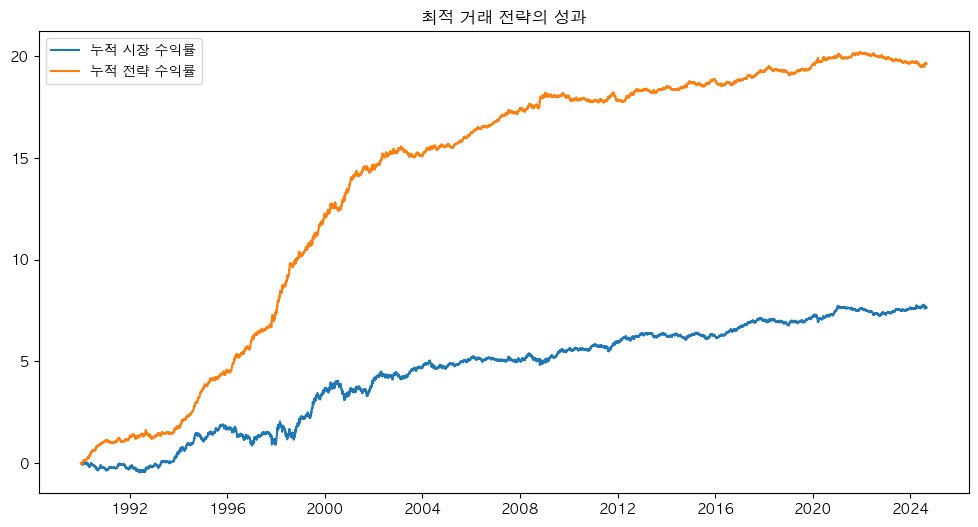

In [10]:
import pandas as pd
import numpy as np
import random
import operator
import matplotlib.pyplot as plt
from deap import base, creator, tools, gp, algorithms
from datetime import timedelta
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

# 필요한 라이브러리 설치
# pip install deap

# 1. 데이터 준비
# price_df와 factor_df는 이미 로드되어 있다고 가정합니다.

# 예시로 데이터 로드 (실제 데이터로 대체하세요)
# price_df = pd.read_csv('price_data.csv', index_col='Date', parse_dates=True)
# factor_df = pd.read_csv('factor_data.csv', index_col='Date', parse_dates=True)

# 2. 수익률 계산
price_df = price_df.sort_index()
returns_df = price_df.pct_change().dropna()

# 사용할 종목 선택 (예: 삼성전자)
price_series = price_df['삼성전자'].dropna()

# 3. 유전 알고리즘 설정

# 3-1. 데이터 타입 정의
class SeriesData:
    pass

class ScalarData:
    pass

# 3-2. 연산자 및 터미널 집합 정의 (타이핑된 GP 사용)
pset = gp.PrimitiveSetTyped("MAIN", [SeriesData], SeriesData)
pset.renameArguments(ARG0='price')

# 연산자 정의 (SeriesData 타입을 입력 및 출력으로 사용)
def add_series(series1, series2):
    return series1 + series2

def sub_series(series1, series2):
    return series1 - series2

def mul_series(series1, series2):
    return series1 * series2

def div_series(series1, series2):
    with np.errstate(divide='ignore', invalid='ignore'):
        result = series1 / series2
        result[~np.isfinite(result)] = 0  # inf 또는 NaN을 0으로 대체
    return result

pset.addPrimitive(add_series, [SeriesData, SeriesData], SeriesData)
pset.addPrimitive(sub_series, [SeriesData, SeriesData], SeriesData)
pset.addPrimitive(mul_series, [SeriesData, SeriesData], SeriesData)
pset.addPrimitive(div_series, [SeriesData, SeriesData], SeriesData)

# 스칼라 연산자 정의 (SeriesData와 ScalarData 간의 연산)
def add_scalar(series, scalar):
    return series + scalar

def sub_scalar(series, scalar):
    return series - scalar

def mul_scalar(series, scalar):
    return series * scalar

def div_scalar(series, scalar):
    with np.errstate(divide='ignore', invalid='ignore'):
        result = series / scalar
        result[~np.isfinite(result)] = 0
    return result

pset.addPrimitive(add_scalar, [SeriesData, ScalarData], SeriesData)
pset.addPrimitive(sub_scalar, [SeriesData, ScalarData], SeriesData)
pset.addPrimitive(mul_scalar, [SeriesData, ScalarData], SeriesData)
pset.addPrimitive(div_scalar, [SeriesData, ScalarData], SeriesData)

# 기술적 지표 함수 정의 (SeriesData를 입력으로 받고 SeriesData를 출력)
def sma(series, window):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    window = max(int(window), 1)  # window가 1 이상이어야 함
    return series.rolling(window=window).mean()

def ema(series, span):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    span = max(int(span), 1)  # span이 1 이상이어야 함
    return series.ewm(span=span, adjust=False).mean()

def rsi(series, period):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    period = max(int(period), 1)  # period가 1 이상이어야 함
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    gain = up.rolling(window=period).mean()
    loss = down.rolling(window=period).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

pset.addPrimitive(sma, [SeriesData, ScalarData], SeriesData)
pset.addPrimitive(ema, [SeriesData, ScalarData], SeriesData)
pset.addPrimitive(rsi, [SeriesData, ScalarData], SeriesData)

# 터미널 정의
# ScalarData 타입의 상수 추가
pset.addTerminal(5, ScalarData)
pset.addTerminal(10, ScalarData)
pset.addTerminal(14, ScalarData)
pset.addTerminal(20, ScalarData)
pset.addTerminal(50, ScalarData)
pset.addTerminal(100, ScalarData)
pset.addTerminal(200, ScalarData)

# 입력 변수 price는 SeriesData 타입으로 이미 정의됨

# 3-3. 적합도 함수 정의
def evaluate_individual(individual):
    #print(individual)
    func = toolbox.compile(expr=individual)
    try:
        signal = func(price_series)
        
        # 항상 signal을 pandas.Series로 변환
        if isinstance(signal, np.ndarray):
            signal = pd.Series(signal, index=price_series.index)
        
        signal = signal.fillna(0)
        signal = np.where(signal > 0, 1, -1)  # 매수/매도 신호로 변환

        # 수익률 계산
        returns = price_series.pct_change().dropna()
        
        # 길이 조정: signal과 returns의 길이를 맞추기 위해 signal을 자름
        signal = pd.Series(signal, index=price_series.index)
        signal = signal[:-1] if len(signal) > len(returns) else signal
        
        if len(signal) != len(returns):
            raise ValueError(f"Signal length {len(signal)} does not match returns length {len(returns)}.")

        strategy_returns = returns.shift(-1) * signal  # 다음날 수익률에 적용
        strategy_returns = strategy_returns.dropna()

        # 거래 비용 고려 (예: 0.1%)
        trading_cost = 0.001
        trades = signal.diff().fillna(0) != 0  # signal이 항상 pandas.Series이므로 .diff()를 사용 가능
        strategy_returns[trades] -= trading_cost

        # 4-팩터 모델을 사용하여 알파 계산
        factors = factor_df.loc[strategy_returns.index]
        factors = factors.dropna()

        if factors.empty or strategy_returns.empty:
            raise ValueError("Either factors or strategy returns are empty after alignment.")

        strategy_returns = strategy_returns.loc[factors.index]

        X = factors[['MKT', 'SMB', 'HML', 'MOM']]
        y = strategy_returns - 0.02 / 252  # 무위험 이자율 가정 (연 2%)
        X = add_constant(X)

        model = OLS(y, X).fit()
        alpha = model.params['const']
        t_stat = model.tvalues['const']
        
        # 디버깅 정보 출력
        #print(f"Alpha: {alpha}, t-stat: {t_stat}")

        # 적합도는 알파의 값과 t-통계값에 기반
        if t_stat > 2:
            return alpha,
        else:
            return -np.inf,
        
    except Exception as e:
        # 예외가 발생할 경우 해당 예외 정보와 메시지를 출력
        print(f"Exception occurred: {e}")
        return -np.inf,

# 3-4. DEAP 설정
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('expr', gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register('individual', tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

toolbox.register('compile', gp.compile, pset=pset)
toolbox.register('evaluate', evaluate_individual)
toolbox.register('select', tools.selTournament, tournsize=3)
toolbox.register('mate', gp.cxOnePoint)
toolbox.register('expr_mut', gp.genFull, min_=0, max_=2)
toolbox.register('mutate', gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# 보호된 계산 (에러 방지를 위한 데코레이터)
def protected_div(left, right):
    with np.errstate(divide='ignore', invalid='ignore'):
        result = np.true_divide(left, right)
        if isinstance(result, pd.Series):
            result[~np.isfinite(result)] = 0
        else:
            if not np.isfinite(result):
                result = 0
        return result

pset.addPrimitive(protected_div, [SeriesData, SeriesData], SeriesData)
pset.addPrimitive(protected_div, [SeriesData, ScalarData], SeriesData)
pset.addPrimitive(protected_div, [ScalarData, ScalarData], ScalarData)

# 4. 유전 알고리즘 실행

def main():
    random.seed(42)
    population = toolbox.population(n=500)
    NGEN = 10
    CXPB = 0.5
    MUTPB = 0.2

    print("유전 알고리즘을 시작합니다...")
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(1, NGEN + 1):
        print(f"-- 세대 {gen} --")

        # 선택
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # 교차 및 돌연변이
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # 적합도 평가
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        for ind in population[:10]:
            print(f"개체 샘플 출력: {ind}")
        # 새로운 세대 생성
        population[:] = offspring

        # 현재 세대의 최고 개체 출력
        top_ind = tools.selBest(population, 1)[0]
        print(f"최고의 개체: {str(top_ind)}, 적합도: {top_ind.fitness.values}")

    print("-- 최종 결과 --")
    best_ind = tools.selBest(population, 1)[0]
    print(f"최고의 개체: {str(best_ind)}, 적합도: {best_ind.fitness.values}")

    # 최적의 거래 규칙 시각화
    func = toolbox.compile(expr=best_ind)
    signal = func(price_series)
    signal = pd.Series(signal, index=price_series.index)
    signal = signal.fillna(0)
    signal = np.where(signal > 0, 1, -1)

    plt.figure(figsize=(12,6))
    plt.plot(price_series.index, np.cumsum(price_series.pct_change().fillna(0)), label='누적 시장 수익률')
    plt.plot(price_series.index[:-1], np.cumsum(signal[:-1] * price_series.pct_change().shift(-1).fillna(0)[:-1]), label='누적 전략 수익률')
    plt.legend()
    plt.title('최적 거래 전략의 성과')
    plt.show()

if __name__ == "__main__":
    main()
    


In [76]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, gp
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import warnings
import copy  # deepcopy 사용을 위해 import

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (필요 시 주석 해제)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

class GeneticProgrammingTrader:
    def __init__(self, price_df, factor_df, training_years=5, selection_years=5, out_sample_years=1, days_per_year=365):
        """
        초기화 메서드
        :param price_df: 주가 데이터 DataFrame
        :param factor_df: 팩터 데이터 DataFrame
        :param training_years: 학습 기간 (년)
        :param selection_years: 선택 기간 (년)
        :param out_sample_years: 외부 검증 기간 (년)
        :param days_per_year: 연도당 일수
        """
        self.price_df = price_df
        self.factor_df = factor_df
        self.training_years = training_years
        self.selection_years = selection_years
        self.out_sample_years = out_sample_years
        self.days_per_year = days_per_year
        self.setup_data()
        self.setup_gp()
    
    def setup_data(self):
        """
        데이터를 학습, 선택, 외부 검증 기간으로 분할
        """
        total_days = len(self.price_df)
        training_days = self.training_years * self.days_per_year
        selection_days = self.selection_years * self.days_per_year
        out_sample_days = self.out_sample_years * self.days_per_year
        
        if total_days < training_days + selection_days + out_sample_days:
            raise ValueError(f"데이터가 충분히 길지 않습니다. 최소 {self.training_years + self.selection_years + self.out_sample_years}년의 데이터가 필요합니다.")
        
        self.training_df = self.price_df.iloc[:training_days]
        self.selection_df = self.price_df.iloc[training_days:training_days + selection_days]
        self.out_sample_df = self.price_df.iloc[training_days + selection_days:training_days + selection_days + out_sample_days]
        
        self.training_factors = self.factor_df.iloc[:training_days]
        self.selection_factors = self.factor_df.iloc[training_days:training_days + selection_days]
        self.out_sample_factors = self.factor_df.iloc[training_days + selection_days:training_days + selection_days + out_sample_days]
        
        # 학습 및 선택 기간을 결합하여 GP 진화에 사용
        self.combined_price = pd.concat([self.training_df, self.selection_df])
        self.combined_factors = pd.concat([self.training_factors, self.selection_factors])
        
        # 외부 검증 데이터
        self.out_sample_price = self.out_sample_df['삼성전자']
        self.out_sample_factors = self.out_sample_factors
    
    def setup_gp(self):
        """
        GP 프리미티브 및 DEAP 툴박스 설정
        """
        # 루트 노드 전용 프리미티브 집합 정의
        self.root_pset = gp.PrimitiveSetTyped("ROOT", [pd.Series, int], pd.Series)
        self.root_pset.renameArguments(ARG0='price', ARG1='constant')
        
        # 루트 노드에만 사용할 오퍼레이터 정의
        def if_then_else(condition, then_expr, else_expr):
            return np.where(condition > 0, 1.0, 0.0)
        
        def and_op(a, b):
            return np.logical_and(a > 0, b > 0).astype(float)
        
        def or_op(a, b):
            return np.logical_or(a > 0, b > 0).astype(float)
        
        self.root_pset.addPrimitive(if_then_else, [pd.Series, pd.Series, pd.Series], pd.Series)
        self.root_pset.addPrimitive(and_op, [pd.Series, pd.Series], pd.Series)
        self.root_pset.addPrimitive(or_op, [pd.Series, pd.Series], pd.Series)
        
        # 내부 노드 전용 프리미티브 집합 정의 (조건 오퍼레이터 제외)
        self.inner_pset = gp.PrimitiveSetTyped("INNER", [pd.Series, int], pd.Series)
        self.inner_pset.renameArguments(ARG0='price', ARG1='constant')
        
        # Relational operators
        def greater_than(series, threshold):
            return (series > threshold).astype(float)
        
        def less_than(series, threshold):
            return (series < threshold).astype(float)
        
        self.inner_pset.addPrimitive(greater_than, [pd.Series, int], pd.Series)
        self.inner_pset.addPrimitive(less_than, [pd.Series, int], pd.Series)
        
        # Real functions
        def avg(series, days):
            return series.rolling(window=int(days)).mean()
        
        def max_func(series, days):
            return series.rolling(window=int(days)).max()
        
        def min_func(series, days):
            return series.rolling(window=int(days)).min()
        
        def median(series, days):
            return series.rolling(window=int(days)).median()
        
        def lag(series, days):
            return series.shift(int(days))
        
        def volatility(series, days):
            return series.rolling(window=int(days)).std()
        
        def rsi(series, period):
            delta = series.diff()
            up = delta.clip(lower=0)
            down = -1 * delta.clip(upper=0)
            gain = up.rolling(window=int(period)).mean()
            loss = down.rolling(window=int(period)).mean()
            RS = gain / loss
            RSI = 100 - (100 / (1 + RS))
            return RSI.fillna(0)
        
        self.inner_pset.addPrimitive(avg, [pd.Series, int], pd.Series)
        self.inner_pset.addPrimitive(max_func, [pd.Series, int], pd.Series)
        self.inner_pset.addPrimitive(min_func, [pd.Series, int], pd.Series)
        self.inner_pset.addPrimitive(median, [pd.Series, int], pd.Series)
        self.inner_pset.addPrimitive(lag, [pd.Series, int], pd.Series)
        self.inner_pset.addPrimitive(volatility, [pd.Series, int], pd.Series)
        self.inner_pset.addPrimitive(rsi, [pd.Series, int], pd.Series)
        
        # Real variables (Terminals)
        self.inner_pset.addTerminal(1.0, float)          # Days의 값 중 하나
        self.inner_pset.addTerminal(-1.0, float)         # Pr의 값 중 하나
        self.inner_pset.addTerminal(0.0, float)
        self.inner_pset.addTerminal(0.5, float)
        
        # Integer terminals
        self.inner_pset.addTerminal(0, int)
        self.inner_pset.addTerminal(1, int)
        self.inner_pset.addTerminal(2, int)
        self.inner_pset.addTerminal(3, int)
        self.inner_pset.addTerminal(5, int)
        self.inner_pset.addTerminal(10, int)
        
        # Float operators
        def float_add(a, b):
            return a + b
        
        def float_subtract(a, b):
            return a - b
        
        def float_multiply(a, b):
            return a * b
        
        def float_divide(a, b):
            return a / b if b != 0 else 1.0
        
        self.inner_pset.addPrimitive(float_add, [float, float], float)
        self.inner_pset.addPrimitive(float_subtract, [float, float], float)
        self.inner_pset.addPrimitive(float_multiply, [float, float], float)
        self.inner_pset.addPrimitive(float_divide, [float, float], float)
        
        # int 타입을 반환하는 간단한 프리미티브 함수 추가
        def identity_int(x):
            return x
        
        self.inner_pset.addPrimitive(identity_int, [int], int)
        
        # DEAP 설정
        creator.create('FitnessMax', base.Fitness, weights=(1.0,))
        creator.create('Individual', list, fitness=creator.FitnessMax)
        
        self.toolbox = base.Toolbox()
        
        # 개별 트리 생성기 등록
        self.toolbox.register('expr_root', gp.genFull, pset=self.root_pset, min_=1, max_=2)
        self.toolbox.register('expr_inner', gp.genHalfAndHalf, pset=self.inner_pset, min_=1, max_=3)
        
        # 커스텀 트리 생성 함수
        def create_individual():
            # 루트 노드 생성 (if_then_else, and_op, or_op 중 하나)
            root_tree = gp.PrimitiveTree(self.toolbox.expr_root())
            
            # 루트 노드의 각 자식 노드에 대해 내부 노드 생성
            # 여기서는 간단히, 내부 트리를 재귀적으로 생성하도록 함
            for node in root_tree:
                if isinstance(node, gp.Primitive):
                    for i in range(len(node.args)):
                        # Replace each argument with an inner subtree
                        subtree = gp.PrimitiveTree(self.toolbox.expr_inner())
                        node.args = tuple([subtree if idx == i else arg for idx, arg in enumerate(node.args)])
            
            # buy_expr와 sell_expr 생성
            buy_tree = gp.PrimitiveTree(self.toolbox.expr_root())
            self._expand_tree(buy_tree, self.inner_pset)
            
            sell_tree = gp.PrimitiveTree(self.toolbox.expr_root())
            self._expand_tree(sell_tree, self.inner_pset)
            
            return creator.Individual([buy_tree, sell_tree])
        
        # 트리 확장 함수
        def _expand_tree(self, tree, pset_inner):
            for node in tree:
                if isinstance(node, gp.Primitive):
                    for idx, arg in enumerate(node.args):
                        if isinstance(arg, gp.PrimitiveTree):
                            new_subtree = gp.PrimitiveTree(self.toolbox.expr_inner())
                            self._expand_tree(new_subtree, pset_inner)
                            node.args = tuple([new_subtree if i == idx else a for i, a in enumerate(node.args)])
        
        self.toolbox.register('individual', create_individual)
        self.toolbox.register('population', tools.initRepeat, list, self.toolbox.individual)
        
        self.toolbox.register('compile_buy', gp.compile, pset=self.root_pset)
        self.toolbox.register('compile_sell', gp.compile, pset=self.root_pset)
        self.toolbox.register('select', tools.selTournament, tournsize=3)
        
        # 'expr_mut'를 먼저 등록해야 합니다.
        self.toolbox.register('expr_mut', gp.genFull, pset=self.inner_pset, min_=0, max_=2)
        
        # 'mutate' 등록
        self.toolbox.register('mutate', gp.mutUniform, expr=self.toolbox.expr_mut, pset=self.inner_pset)
        
        # 'mate' 등록
        self.toolbox.register('mate', gp.cxOnePoint)
        
        # 교차 및 돌연변이 함수 수정
        def mate_individuals(ind1, ind2):
            # ind1과 ind2의 각 표현식은 이미 PrimitiveTree 객체임
            self.toolbox.mate(ind1[0], ind2[0])
            self.toolbox.mate(ind1[1], ind2[1])
            del ind1.fitness.values
            del ind2.fitness.values
            return ind1, ind2
        
        def mutate_individual(individual):
            self.toolbox.mutate(individual[0])
            self.toolbox.mutate(individual[1])
            del individual.fitness.values
            return individual,
        
        # toolbox에 커스텀 교차 및 돌연변이 등록
        self.toolbox.register('mate_custom', mate_individuals)
        self.toolbox.register('mutate_custom', mutate_individual)
        
        # 프리미티브 등록 상태 확인 (디버깅 용)
        print("Primitives by type (Root PSet):")
        for typ, prims in self.root_pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
        
        print("\nPrimitives by type (Inner PSet):")
        for typ, prims in self.inner_pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
    
    def _expand_tree(self, tree, pset_inner):
        """
        재귀적으로 트리를 확장하는 함수
        """
        for node in tree:
            if isinstance(node, gp.Primitive):
                for idx, arg in enumerate(node.args):
                    if isinstance(arg, gp.PrimitiveTree):
                        new_subtree = gp.PrimitiveTree(self.toolbox.expr_inner())
                        self._expand_tree(new_subtree, pset_inner)
                        node.args = tuple([new_subtree if i == idx else a for i, a in enumerate(node.args)])
    
    def evaluate_individual(self, individual, price_series, factor_df):
        """
        개체의 적합도를 평가하는 함수
        :param individual: 개체 (buy_expr, sell_expr)
        :param price_series: 주가 시리즈
        :param factor_df: 팩터 데이터프레임
        :return: 적합도 튜플
        """
        buy_expr, sell_expr = individual
        buy_func = self.toolbox.compile_buy(expr=buy_expr)
        sell_func = self.toolbox.compile_sell(expr=sell_expr)
        
        try:
            # 트리 내의 int 상수를 사용하도록 수정
            buy_signal = buy_func(price_series, 1)    # 정수 상수
            sell_signal = sell_func(price_series, -1) # 정수 상수
            
            # ensure buy_signal and sell_signal are pd.Series
            buy_signal = pd.Series(buy_signal, index=price_series.index) if isinstance(buy_signal, np.ndarray) else buy_signal
            sell_signal = pd.Series(sell_signal, index=price_series.index) if isinstance(sell_signal, np.ndarray) else sell_signal
            
            combined_signal = pd.Series(0, index=price_series.index)
            combined_signal[buy_signal > 0] = 1
            combined_signal[sell_signal > 0] = -1
            
            returns = price_series.pct_change().dropna()
            
            combined_signal = combined_signal.shift(1).dropna()
            returns = returns.loc[combined_signal.index]
            
            if len(combined_signal) != len(returns):
                raise ValueError(f"Signal length {len(combined_signal)} does not match returns length {len(returns)}.")
            
            strategy_returns = combined_signal * returns
        
            trading_cost = 0.001
            trades = combined_signal.diff().fillna(0) != 0
            strategy_returns[trades] -= trading_cost
        
            factors = factor_df.loc[strategy_returns.index]
            factors = factors.dropna()
        
            if factors.empty or strategy_returns.empty:
                raise ValueError("Either factors or strategy returns are empty after alignment.")
        
            strategy_returns = strategy_returns.loc[factors.index]
        
            X = factors[['MKT', 'SMB', 'HML', 'MOM']]
            y = strategy_returns - 0.02 / 252
            X = add_constant(X)
        
            model = OLS(y, X).fit()
            alpha = model.params['const']
            t_stat = model.tvalues['const']
            
            if t_stat > 2:
                return alpha,
            else:
                return -np.inf,
            
        except Exception as e:
            print(f"Exception occurred: {e}")
            return -np.inf,
    
    def run_evolution(self, population_size=500, generations=30, cxpb=0.7, mutpb=0.2):
        """
        유전 알고리즘을 실행하는 메서드
        :param population_size: 인구 크기
        :param generations: 세대 수
        :param cxpb: 교차 확률
        :param mutpb: 돌연변이 확률
        :return: 최종 인구
        """
        # 초기 인구 생성
        population = self.toolbox.population(n=population_size)
        
        print("유전 알고리즘을 시작합니다...")
        
        # 프리미티브 등록 상태 확인 (디버깅 용)
        print("Primitives by type (Root PSet):")
        for typ, prims in self.root_pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
        
        print("\nPrimitives by type (Inner PSet):")
        for typ, prims in self.inner_pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
        
        # 초기 개체의 적합도 평가
        for ind in population:
            ind.fitness.values = self.evaluate_individual(ind, self.combined_price['삼성전자'], self.combined_factors)
        
        # 진화 과정
        for gen in range(1, generations + 1):
            print(f"-- 세대 {gen} --")
            offspring = self.toolbox.select(population, len(population))
            offspring = list(map(copy.deepcopy, offspring))  # tools.clone 대신 copy.deepcopy 사용
        
            # Apply crossover
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if random.random() < cxpb:
                    self.toolbox.mate_custom(child1, child2)
        
            # Apply mutation
            for mutant in offspring:
                if random.random() < mutpb:
                    self.toolbox.mutate_custom(mutant)
        
            # Evaluate the individuals with invalid fitness
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            for ind in invalid_ind:
                ind.fitness.values = self.evaluate_individual(ind, self.combined_price['삼성전자'], self.combined_factors)
        
            population[:] = offspring
        
            # 상위 개체 출력
            top_ind = tools.selBest(population, 1)[0]
            buy_tree = top_ind[0]
            sell_tree = top_ind[1]
            print(f"최고의 개체 Buy Expression: {buy_tree}")
            print(f"최고의 개체 Sell Expression: {sell_tree}")
            print(f"적합도: {top_ind.fitness.values}")
        
        print("-- 최종 결과 --")
        best_ind = tools.selBest(population, 1)[0]
        buy_tree = best_ind[0]
        sell_tree = best_ind[1]
        print(f"최고의 개체 Buy Expression: {buy_tree}")
        print(f"최고의 개체 Sell Expression: {sell_tree}")
        print(f"적합도: {best_ind.fitness.values}")
        
        self.best_individual = best_ind
        return population
    
    def evaluate_out_of_sample(self):
        """
        외부 검증 기간을 사용하여 최고의 개체의 성과를 평가하고 시각화
        """
        if not hasattr(self, 'best_individual'):
            raise AttributeError("먼저 유전 알고리즘을 실행하여 최고 개체를 선택해야 합니다.")
        
        best_ind = self.best_individual
        buy_tree = best_ind[0]
        sell_tree = best_ind[1]
        
        # 최적의 거래 규칙 외부 검증
        buy_func = self.toolbox.compile_buy(expr=buy_tree)
        sell_func = self.toolbox.compile_sell(expr=sell_tree)
    
        buy_signal = buy_func(self.out_sample_price, 1)    # 정수 상수
        sell_signal = sell_func(self.out_sample_price, -1) # 정수 상수
    
        # ensure buy_signal and sell_signal are pd.Series
        buy_signal = pd.Series(buy_signal, index=self.out_sample_price.index) if isinstance(buy_signal, np.ndarray) else buy_signal
        sell_signal = pd.Series(sell_signal, index=self.out_sample_price.index) if isinstance(sell_signal, np.ndarray) else sell_signal
    
        # Buy/Sell 신호를 1, -1로 변환
        combined_signal = pd.Series(0, index=self.out_sample_price.index)
        combined_signal[buy_signal > 0] = 1
        combined_signal[sell_signal > 0] = -1
    
        # 다음날 수익률에 신호 적용
        returns = self.out_sample_price.pct_change().dropna()
        combined_signal = combined_signal.shift(1).dropna()
        returns = returns.loc[combined_signal.index]
    
        if len(combined_signal) != len(returns):
            raise ValueError(f"Signal length {len(combined_signal)} does not match returns length {len(returns)}.")
    
        strategy_returns = combined_signal * returns
    
        # 거래 비용 고려 (예: 0.1%)
        trading_cost = 0.001
        trades = combined_signal.diff().fillna(0) != 0
        strategy_returns[trades] -= trading_cost
    
        # 누적 시장 수익률 및 전략 수익률 시각화
        plt.figure(figsize=(12,6))
        plt.plot(self.out_sample_price.index, np.cumsum(self.out_sample_price.pct_change().fillna(0)), label='누적 시장 수익률')
        plt.plot(self.out_sample_price.index[:-1], np.cumsum(strategy_returns), label='누적 전략 수익률')
        plt.legend()
        plt.title('외부 검증 기간 동안의 전략 성과')
        plt.xlabel('날짜')
        plt.ylabel('누적 수익률')
        plt.show()
    
        # Buy/Sell 신호 시각화
        plt.figure(figsize=(12,6))
        plt.plot(self.out_sample_price.index, self.out_sample_price, label='가격')
        plt.scatter(buy_signal.index[buy_signal > 0], self.out_sample_price[buy_signal > 0], marker='^', color='g', label='Buy Signal', alpha=0.6)
        plt.scatter(sell_signal.index[sell_signal > 0], self.out_sample_price[sell_signal > 0], marker='v', color='r', label='Sell Signal', alpha=0.6)
        plt.legend()
        plt.title('외부 검증 기간 동안의 가격과 Buy/Sell 신호')
        plt.xlabel('날짜')
        plt.ylabel('가격')
        plt.show()
    
        # Buy/Sell 신호 표출
        print("Buy Signal 예시:")
        print(buy_signal[buy_signal > 0].head())
    
        print("Sell Signal 예시:")
        print(sell_signal[sell_signal > 0].head())
    
        # 전략 수익률 요약
        total_strategy_return = strategy_returns.sum()
        total_market_return = self.out_sample_price.pct_change().sum()
        print(f"외부 검증 기간 동안의 전략 총 수익률: {total_strategy_return:.4f}")
        print(f"외부 검증 기간 동안의 시장 총 수익률: {total_market_return:.4f}")
    
    def plot_primitives(self):
        """
        등록된 프리미티브를 출력하는 메서드
        """
        print("Primitives by type (Root PSet):")
        for typ, prims in self.root_pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
        
        print("\nPrimitives by type (Inner PSet):")
        for typ, prims in self.inner_pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
    
    def summarize_population(self, population, top=5):
        """
        현재 인구의 상위 개체들을 요약하는 메서드
        :param population: 인구 리스트
        :param top: 요약할 상위 개체 수
        """
        top_inds = tools.selBest(population, top)
        print(f"상위 {top} 개체:")
        for i, ind in enumerate(top_inds, 1):
            buy_tree = ind[0]
            sell_tree = ind[1]
            fitness = ind.fitness.values
            print(f"{i}. Buy: {buy_tree}, Sell: {sell_tree}, Fitness: {fitness}")

# 사용 예시
def main():
    # 1. 데이터 생성 및 분할
    # def generate_data():
    #     # 날짜 생성: 11년 (4018일 기준 약 11*365)
    #     dates = pd.date_range(start='2012-01-01', periods=4018, freq='D')  # 11년
    #     # 가격 데이터 생성: 무작위 누적합
    #     price_df = pd.DataFrame({
    #         '삼성전자': np.random.randn(len(dates)).cumsum() + 100  # 임의의 주가 데이터
    #     }, index=dates)
        
    #     # # 팩터 데이터 생성: 무작위 값
    #     # factor_df = pd.DataFrame({
    #     #     'MKT': np.random.randn(len(dates)),
    #     #     'SMB': np.random.randn(len(dates)),
    #     #     'HML': np.random.randn(len(dates)),
    #     #     'MOM': np.random.randn(len(dates))
    #     # }, index=dates)
        
    #     return price_df, factor_df
    
    # price_df, factor_df = generate_data()
    
    # 2. GeneticProgrammingTrader 클래스 인스턴스 생성
    gp_trader = GeneticProgrammingTrader(price_df, factor_df)
    
    # 3. 프리미티브 확인 (옵션)
    gp_trader.plot_primitives()
    
    # 4. 유전 알고리즘 실행
    population = gp_trader.run_evolution(population_size=500, generations=30, cxpb=0.7, mutpb=0.2)
    
    # 5. 상위 개체 요약 (옵션)
    gp_trader.summarize_population(population, top=5)
    
    # 6. 외부 검증 수행
    gp_trader.evaluate_out_of_sample()

if __name__ == "__main__":
    main()

Primitives by type (Root PSet):
Type <class 'pandas.core.series.Series'>: ['if_then_else', 'and_op', 'or_op']
Type <class 'int'>: []

Primitives by type (Inner PSet):
Type <class 'pandas.core.series.Series'>: ['greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
Primitives by type (Root PSet):
Type <class 'pandas.core.series.Series'>: ['if_then_else', 'and_op', 'or_op']
Type <class 'int'>: []

Primitives by type (Inner PSet):
Type <class 'pandas.core.series.Series'>: ['greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']


TypeError: unhashable type: 'PrimitiveTree'

In [58]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, gp
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 3-2. 연산자 및 터미널 집합 정의 (타이핑된 GP 사용)
# 입력 타입: pd.Series, float; 출력 타입: pd.Series
pset = gp.PrimitiveSetTyped("MAIN", [pd.Series, float], pd.Series)
pset.renameArguments(ARG0='price', ARG1='constant')

# Level 1: Boolean operators and functions
def and_op(a, b):
    return np.logical_and(a > 0, b > 0).astype(float)

def or_op(a, b):
    return np.logical_or(a > 0, b > 0).astype(float)

pset.addPrimitive(and_op, [pd.Series, pd.Series], pd.Series)
pset.addPrimitive(or_op, [pd.Series, pd.Series], pd.Series)

# Level 2: Relational operators
def greater_than(series, threshold):
    return (series > threshold).astype(float)

def less_than(series, threshold):
    return (series < threshold).astype(float)

pset.addPrimitive(greater_than, [pd.Series, float], pd.Series)
pset.addPrimitive(less_than, [pd.Series, float], pd.Series)

# Level 3: Real functions
def avg(series, days):
    return series.rolling(window=int(days)).mean()

def max_func(series, days):
    return series.rolling(window=int(days)).max()

def min_func(series, days):
    return series.rolling(window=int(days)).min()

def median(series, days):
    return series.rolling(window=int(days)).median()

def lag(series, days):
    return series.shift(int(days))

def volatility(series, days):
    return series.rolling(window=int(days)).std()

def rsi(series, period):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    gain = up.rolling(window=int(period)).mean()
    loss = down.rolling(window=int(period)).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI.fillna(0)

pset.addPrimitive(avg, [pd.Series, float], pd.Series)
pset.addPrimitive(max_func, [pd.Series, float], pd.Series)
pset.addPrimitive(min_func, [pd.Series, float], pd.Series)
pset.addPrimitive(median, [pd.Series, float], pd.Series)
pset.addPrimitive(lag, [pd.Series, float], pd.Series)
pset.addPrimitive(volatility, [pd.Series, float], pd.Series)
pset.addPrimitive(rsi, [pd.Series, float], pd.Series)

# Level 4: Real variables (Terminals)
pset.addTerminal(1.0, float)          # Days의 값 중 하나
pset.addTerminal(-1.0, float)         # Pr의 값 중 하나
pset.addTerminal(0.0, float)
pset.addTerminal(0.5, float)

# Boolean terminals
pset.addTerminal(True, bool)
pset.addTerminal(False, bool)

# Ephemeral constants (무작위 float 생성)
pset.addEphemeralConstant("rand_float", lambda: random.uniform(-10, 10), float)

# 추가: float 연산자 등록 (이름 변경 후)
def float_add(a, b):
    return a + b

def float_subtract(a, b):
    return a - b

def float_multiply(a, b):
    return a * b

def float_divide(a, b):
    return a / b if b != 0 else 1.0

pset.addPrimitive(float_add, [float, float], float)
pset.addPrimitive(float_subtract, [float, float], float)
pset.addPrimitive(float_multiply, [float, float], float)
pset.addPrimitive(float_divide, [float, float], float)

# 프리미티브 등록 후 pset.primitives 출력
print("Primitives by type:")
for typ, prims in pset.primitives.items():
    prim_names = []
    for p in prims:
        if hasattr(p, 'name'):
            prim_names.append(p.name)
        elif hasattr(p, 'value'):
            prim_names.append(str(p.value))
        else:
            prim_names.append(str(p))
    print(f"Type {typ}: {prim_names}")

# 3-3. 적합도 함수 정의
def evaluate_individual(individual, price_series, factor_df):
    buy_expr, sell_expr = individual
    # 이미 individual의 각 요소는 PrimitiveTree 객체라고 가정
    buy_func = toolbox.compile(expr=buy_expr)
    sell_func = toolbox.compile(expr=sell_expr)
    
    try:
        # 트리 내의 float 상수를 사용하도록 float 연산자를 활용
        buy_signal = buy_func(price_series, 1.0)    # 예시 float 상수
        sell_signal = sell_func(price_series, -1.0) # 예시 float 상수
        
        # ensure buy_signal and sell_signal are pd.Series
        buy_signal = pd.Series(buy_signal, index=price_series.index) if isinstance(buy_signal, np.ndarray) else buy_signal
        sell_signal = pd.Series(sell_signal, index=price_series.index) if isinstance(sell_signal, np.ndarray) else sell_signal
        
        combined_signal = pd.Series(0, index=price_series.index)
        combined_signal[buy_signal > 0] = 1
        combined_signal[sell_signal > 0] = -1
        
        returns = price_series.pct_change().dropna()
        
        combined_signal = combined_signal.shift(1).dropna()
        returns = returns.loc[combined_signal.index]
        
        if len(combined_signal) != len(returns):
            raise ValueError(f"Signal length {len(combined_signal)} does not match returns length {len(returns)}.")
        
        strategy_returns = combined_signal * returns
    
        trading_cost = 0.001
        trades = combined_signal.diff().fillna(0) != 0
        strategy_returns[trades] -= trading_cost
    
        factors = factor_df.loc[strategy_returns.index]
        factors = factors.dropna()
    
        if factors.empty or strategy_returns.empty:
            raise ValueError("Either factors or strategy returns are empty after alignment.")
    
        strategy_returns = strategy_returns.loc[factors.index]
    
        X = factors[['MKT', 'SMB', 'HML', 'MOM']]
        y = strategy_returns - 0.02 / 252
        X = add_constant(X)
    
        model = OLS(y, X).fit()
        alpha = model.params['const']
        t_stat = model.tvalues['const']
        
        if t_stat > 2:
            return alpha,
        else:
            return -np.inf,
        
    except Exception as e:
        print(f"Exception occurred: {e}")
        return -np.inf,

# 3-4. DEAP 설정
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# 개별 트리 생성기 등록
toolbox.register('expr_buy', gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register('expr_sell', gp.genHalfAndHalf, pset=pset, min_=1, max_=3)

# 개별 생성 함수 등록
def create_individual():
    # 개체 내의 표현식을 PrimitiveTree로 변환하여 포함
    return creator.Individual([
        gp.PrimitiveTree(toolbox.expr_buy()),
        gp.PrimitiveTree(toolbox.expr_sell())
    ])

toolbox.register('individual', create_individual)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

toolbox.register('compile', gp.compile, pset=pset)
toolbox.register('select', tools.selTournament, tournsize=3)

# 'expr_mut'를 먼저 등록해야 합니다.
toolbox.register('expr_mut', gp.genFull, pset=pset, min_=0, max_=2)

# 'mutate' 등록
toolbox.register('mutate', gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# 'mate' 등록
toolbox.register('mate', gp.cxOnePoint)

# 교차 및 돌연변이 함수 수정
def mate_individuals(ind1, ind2):
    # ind1과 ind2의 각 표현식은 이미 PrimitiveTree 객체임
    toolbox.mate(ind1[0], ind2[0])
    toolbox.mate(ind1[1], ind2[1])
    del ind1.fitness.values
    del ind2.fitness.values
    return ind1, ind2

def mutate_individual(individual):
    toolbox.mutate(individual[0])
    toolbox.mutate(individual[1])
    del individual.fitness.values
    return individual,

# toolbox에 커스텀 교차 및 돌연변이 등록
toolbox.register('mate_custom', mate_individuals)
toolbox.register('mutate_custom', mutate_individual)

# 4. 유전 알고리즘 실행
def main():
    # 실제 데이터 사용
    # 이미 존재하는 price_df와 factor_df 사용 (예: price_df의 '삼성전자')
    # 예시로 price_df와 factor_df가 전역 변수로 존재한다고 가정
    
    global price_series, factor_df
    
    price_series = price_df['삼성전자']
    # factor_df는 이미 정의되어 있다고 가정
    
    random.seed(42)
    population = toolbox.population(n=10)
    NGEN = 10
    CXPB = 0.5
    MUTPB = 0.2

    print("유전 알고리즘을 시작합니다...")

    # 프리미티브 등록 상태 확인
    print("Primitives by type:")
    for typ, prims in pset.primitives.items():
        prim_names = []
        for p in prims:
            if hasattr(p, 'name'):
                prim_names.append(p.name)
            elif hasattr(p, 'value'):
                prim_names.append(str(p.value))
            else:
                prim_names.append(str(p))
        print(f"Type {typ}: {prim_names}")

    # 초기 개체의 적합도 평가
    for ind in population:
        ind.fitness.values = evaluate_individual(ind, price_series, factor_df)
    
    for gen in range(1, NGEN + 1):
        print(f"-- 세대 {gen} --")
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate_custom(child1, child2)

        # Apply mutation
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate_custom(mutant)

        # Evaluate the individuals with invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        for ind in invalid_ind:
            ind.fitness.values = evaluate_individual(ind, price_series, factor_df)

        population[:] = offspring

        top_ind = tools.selBest(population, 1)[0]
        print(f"최고의 개체: {str(top_ind)}, 적합도: {top_ind.fitness.values}")
    
    print("-- 최종 결과 --")
    best_ind = tools.selBest(population, 1)[0]
    print(f"최고의 개체: {str(best_ind)}, 적합도: {best_ind.fitness.values}")

if __name__ == "__main__":
    main()

Primitives by type:
Type <class 'pandas.core.series.Series'>: ['and_op', 'or_op', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
Type <class 'bool'>: []
유전 알고리즘을 시작합니다...
Primitives by type:
Type <class 'pandas.core.series.Series'>: ['and_op', 'or_op', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
Type <class 'bool'>: []
Exception occurred: window must be an integer 0 or greater
Exception occurred: window must be an integer 0 or greater
Exception occurred: window must be an integer 0 or greater
Exception occurred: window must be an integer 0 or greater
Exception occurred: window must be an integer 0 or greater
-- 세대 1 --
Exception occurred: window must be an integer 0 or greater
Exception occurred: window must b

In [63]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, gp
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (필요 시 주석 해제)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 3-2. 연산자 및 터미널 집합 정의 (타이핑된 GP 사용)
# 입력 타입: pd.Series, float; 출력 타입: pd.Series
pset = gp.PrimitiveSetTyped("MAIN", [pd.Series, float], pd.Series)
pset.renameArguments(ARG0='price', ARG1='constant')

# Level 1: Boolean operators and functions
def and_op(a, b):
    return np.logical_and(a > 0, b > 0).astype(float)

def or_op(a, b):
    return np.logical_or(a > 0, b > 0).astype(float)

pset.addPrimitive(and_op, [pd.Series, pd.Series], pd.Series)
pset.addPrimitive(or_op, [pd.Series, pd.Series], pd.Series)

# Level 2: Relational operators
def greater_than(series, threshold):
    return (series > threshold).astype(float)

def less_than(series, threshold):
    return (series < threshold).astype(float)

pset.addPrimitive(greater_than, [pd.Series, float], pd.Series)
pset.addPrimitive(less_than, [pd.Series, float], pd.Series)

# Level 3: Real functions
def avg(series, days):
    return series.rolling(window=int(days)).mean()

def max_func(series, days):
    return series.rolling(window=int(days)).max()

def min_func(series, days):
    return series.rolling(window=int(days)).min()

def median(series, days):
    return series.rolling(window=int(days)).median()

def lag(series, days):
    return series.shift(int(days))

def volatility(series, days):
    return series.rolling(window=int(days)).std()

def rsi(series, period):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    gain = up.rolling(window=int(period)).mean()
    loss = down.rolling(window=int(period)).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI.fillna(0)

pset.addPrimitive(avg, [pd.Series, int], pd.Series)
pset.addPrimitive(max_func, [pd.Series, int], pd.Series)
pset.addPrimitive(min_func, [pd.Series, int], pd.Series)
pset.addPrimitive(median, [pd.Series, int], pd.Series)
pset.addPrimitive(lag, [pd.Series, int], pd.Series)
pset.addPrimitive(volatility, [pd.Series, int], pd.Series)
pset.addPrimitive(rsi, [pd.Series, int], pd.Series)

# Level 4: Real variables (Terminals)
pset.addTerminal(1.0, float)          # Days의 값 중 하나
pset.addTerminal(-1.0, float)         # Pr의 값 중 하나
pset.addTerminal(0.0, float)
pset.addTerminal(0.5, float)

# Integer terminals
pset.addTerminal(0, int)
pset.addTerminal(1, int)
pset.addTerminal(2, int)
pset.addTerminal(3, int)
pset.addTerminal(5, int)
pset.addTerminal(10, int)

# Boolean terminals
pset.addTerminal(True, bool)
pset.addTerminal(False, bool)

# Ephemeral constants (무작위 float 생성)
pset.addEphemeralConstant("rand_float", lambda: random.uniform(-10, 10), float)

# 추가: float 연산자 등록 (이름 변경 후)
def float_add(a, b):
    return a + b

def float_subtract(a, b):
    return a - b

def float_multiply(a, b):
    return a * b

def float_divide(a, b):
    return a / b if b != 0 else 1.0

pset.addPrimitive(float_add, [float, float], float)
pset.addPrimitive(float_subtract, [float, float], float)
pset.addPrimitive(float_multiply, [float, float], float)
pset.addPrimitive(float_divide, [float, float], float)

# 프리미티브 등록 후 pset.primitives 출력
print("Primitives by type:")
for typ, prims in pset.primitives.items():
    prim_names = []
    for p in prims:
        if hasattr(p, 'name'):
            prim_names.append(p.name)
        elif hasattr(p, 'value'):
            prim_names.append(str(p.value))
        else:
            prim_names.append(str(p))
    print(f"Type {typ}: {prim_names}")

# 3-3. 적합도 함수 정의
def evaluate_individual(individual, price_series, factor_df):
    buy_expr, sell_expr = individual
    # 이미 individual의 각 요소는 PrimitiveTree 객체라고 가정
    buy_func = toolbox.compile(expr=buy_expr)
    sell_func = toolbox.compile(expr=sell_expr)
    
    try:
        # 트리 내의 float 상수를 사용하도록 float 연산자를 활용
        buy_signal = buy_func(price_series, 1.0)    # 예시 float 상수
        sell_signal = sell_func(price_series, -1.0) # 예시 float 상수
        
        # ensure buy_signal and sell_signal are pd.Series
        buy_signal = pd.Series(buy_signal, index=price_series.index) if isinstance(buy_signal, np.ndarray) else buy_signal
        sell_signal = pd.Series(sell_signal, index=price_series.index) if isinstance(sell_signal, np.ndarray) else sell_signal
        
        combined_signal = pd.Series(0, index=price_series.index)
        combined_signal[buy_signal > 0] = 1
        combined_signal[sell_signal > 0] = -1
        
        returns = price_series.pct_change().dropna()
        
        combined_signal = combined_signal.shift(1).dropna()
        returns = returns.loc[combined_signal.index]
        
        if len(combined_signal) != len(returns):
            raise ValueError(f"Signal length {len(combined_signal)} does not match returns length {len(returns)}.")
        
        strategy_returns = combined_signal * returns
    
        trading_cost = 0.001
        trades = combined_signal.diff().fillna(0) != 0
        strategy_returns[trades] -= trading_cost
    
        factors = factor_df.loc[strategy_returns.index]
        factors = factors.dropna()
    
        if factors.empty or strategy_returns.empty:
            raise ValueError("Either factors or strategy returns are empty after alignment.")
    
        strategy_returns = strategy_returns.loc[factors.index]
    
        X = factors[['MKT', 'SMB', 'HML', 'MOM']]
        y = strategy_returns - 0.02 / 252
        X = add_constant(X)
    
        model = OLS(y, X).fit()
        alpha = model.params['const']
        t_stat = model.tvalues['const']
        
        if t_stat > 2:
            return alpha,
        else:
            return -np.inf,
        
    except Exception as e:
        print(f"Exception occurred: {e}")
        return -np.inf,

# 3-4. DEAP 설정
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# 개별 트리 생성기 등록
toolbox.register('expr_buy', gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register('expr_sell', gp.genHalfAndHalf, pset=pset, min_=1, max_=3)

# 개별 생성 함수 등록
def create_individual():
    # 개체 내의 표현식을 PrimitiveTree로 변환하여 포함
    return creator.Individual([
        gp.PrimitiveTree(toolbox.expr_buy()),
        gp.PrimitiveTree(toolbox.expr_sell())
    ])

toolbox.register('individual', create_individual)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

toolbox.register('compile', gp.compile, pset=pset)
toolbox.register('select', tools.selTournament, tournsize=3)

# 'expr_mut'를 먼저 등록해야 합니다.
toolbox.register('expr_mut', gp.genFull, pset=pset, min_=0, max_=2)

# 'mutate' 등록
toolbox.register('mutate', gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# 'mate' 등록
toolbox.register('mate', gp.cxOnePoint)

# 교차 및 돌연변이 함수 수정
def mate_individuals(ind1, ind2):
    # ind1과 ind2의 각 표현식은 이미 PrimitiveTree 객체임
    toolbox.mate(ind1[0], ind2[0])
    toolbox.mate(ind1[1], ind2[1])
    del ind1.fitness.values
    del ind2.fitness.values
    return ind1, ind2

def mutate_individual(individual):
    toolbox.mutate(individual[0])
    toolbox.mutate(individual[1])
    del individual.fitness.values
    return individual,

# toolbox에 커스텀 교차 및 돌연변이 등록
toolbox.register('mate_custom', mate_individuals)
toolbox.register('mutate_custom', mutate_individual)

# 4. 유전 알고리즘 실행
def main():
    # 실제 데이터 사용
    # 이미 존재하는 price_df와 factor_df 사용 (예: price_df의 '삼성전자')
    # 예시로 price_df와 factor_df가 전역 변수로 존재한다고 가정
    
    global price_series, factor_df
    

    
    price_series = price_df['삼성전자']
    # factor_df는 이미 정의되어 있다고 가정
    
    random.seed(42)
    population = toolbox.population(n=500)
    NGEN = 10
    CXPB = 0.5
    MUTPB = 0.2

    print("유전 알고리즘을 시작합니다...")

    # 프리미티브 등록 상태 확인
    print("Primitives by type:")
    for typ, prims in pset.primitives.items():
        prim_names = []
        for p in prims:
            if hasattr(p, 'name'):
                prim_names.append(p.name)
            elif hasattr(p, 'value'):
                prim_names.append(str(p.value))
            else:
                prim_names.append(str(p))
        print(f"Type {typ}: {prim_names}")

    # 초기 개체의 적합도 평가
    for ind in population:
        ind.fitness.values = evaluate_individual(ind, price_series, factor_df)
    
    for gen in range(1, NGEN + 1):
        print(f"-- 세대 {gen} --")
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate_custom(child1, child2)

        # Apply mutation
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate_custom(mutant)

        # Evaluate the individuals with invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        for ind in invalid_ind:
            ind.fitness.values = evaluate_individual(ind, price_series, factor_df)

        population[:] = offspring

        top_ind = tools.selBest(population, 1)[0]
        # 최고의 개체를 트리 형태로 출력
        buy_tree = top_ind[0]
        sell_tree = top_ind[1]
        print(f"최고의 개체 Buy Expression: {buy_tree}")
        print(f"최고의 개체 Sell Expression: {sell_tree}")
        print(f"적합도: {top_ind.fitness.values}")
    
    print("-- 최종 결과 --")
    best_ind = tools.selBest(population, 1)[0]
    buy_tree = best_ind[0]
    sell_tree = best_ind[1]
    print(f"최고의 개체 Buy Expression: {buy_tree}")
    print(f"최고의 개체 Sell Expression: {sell_tree}")
    print(f"적합도: {best_ind.fitness.values}")

    # 최적의 거래 규칙 시각화
    buy_func = toolbox.compile(expr=best_ind[0])
    sell_func = toolbox.compile(expr=best_ind[1])

    buy_signal = buy_func(price_series, 1.0)
    sell_signal = sell_func(price_series, -1.0)

    # ensure buy_signal and sell_signal are pd.Series
    buy_signal = pd.Series(buy_signal, index=price_series.index) if isinstance(buy_signal, np.ndarray) else buy_signal
    sell_signal = pd.Series(sell_signal, index=price_series.index) if isinstance(sell_signal, np.ndarray) else sell_signal

    # Buy/Sell 신호를 1, -1로 변환
    combined_signal = pd.Series(0, index=price_series.index)
    combined_signal[buy_signal > 0] = 1
    combined_signal[sell_signal > 0] = -1

    # 다음날 수익률에 신호 적용
    returns = price_series.pct_change().dropna()
    combined_signal = combined_signal.shift(1).dropna()
    returns = returns.loc[combined_signal.index]

    strategy_returns = combined_signal * returns

    # 거래 비용 고려 (예: 0.1%)
    trading_cost = 0.001
    trades = combined_signal.diff().fillna(0) != 0
    strategy_returns[trades] -= trading_cost

    # 누적 시장 수익률 및 전략 수익률 시각화
    plt.figure(figsize=(12,6))
    plt.plot(price_series.index, np.cumsum(price_series.pct_change().fillna(0)), label='누적 시장 수익률')
    plt.plot(price_series.index[:-1], np.cumsum(strategy_returns), label='누적 전략 수익률')
    plt.legend()
    plt.title('최적 거래 전략의 성과')
    plt.xlabel('날짜')
    plt.ylabel('누적 수익률')
    plt.show()

    # Buy/Sell 신호 시각화
    plt.figure(figsize=(12,6))
    plt.plot(price_series.index, price_series, label='가격')
    plt.scatter(buy_signal.index[buy_signal > 0], price_series[buy_signal > 0], marker='^', color='g', label='Buy Signal', alpha=0.6)
    plt.scatter(sell_signal.index[sell_signal > 0], price_series[sell_signal > 0], marker='v', color='r', label='Sell Signal', alpha=0.6)
    plt.legend()
    plt.title('가격과 Buy/Sell 신호')
    plt.xlabel('날짜')
    plt.ylabel('가격')
    plt.show()

    # Buy/Sell 신호 표출
    print("Buy Signal 예시:")
    print(buy_signal[buy_signal > 0].head())

    print("Sell Signal 예시:")
    print(sell_signal[sell_signal > 0].head())

if __name__ == "__main__":
    main()

Primitives by type:
Type <class 'pandas.core.series.Series'>: ['and_op', 'or_op', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
Type <class 'int'>: []
Type <class 'bool'>: []


IndexError: The gp.generate function tried to add a primitive of type '<class 'int'>', but there is none available.

Primitives by type after setup_gp:
Type <class 'pandas.core.series.Series'>: ['and_op', 'or_op', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
Primitives by type:
Type <class 'pandas.core.series.Series'>: ['and_op', 'or_op', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
유전 알고리즘을 시작합니다...
Primitives by type during run_evolution:
Type <class 'pandas.core.series.Series'>: ['and_op', 'or_op', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
Exception occurred: window must

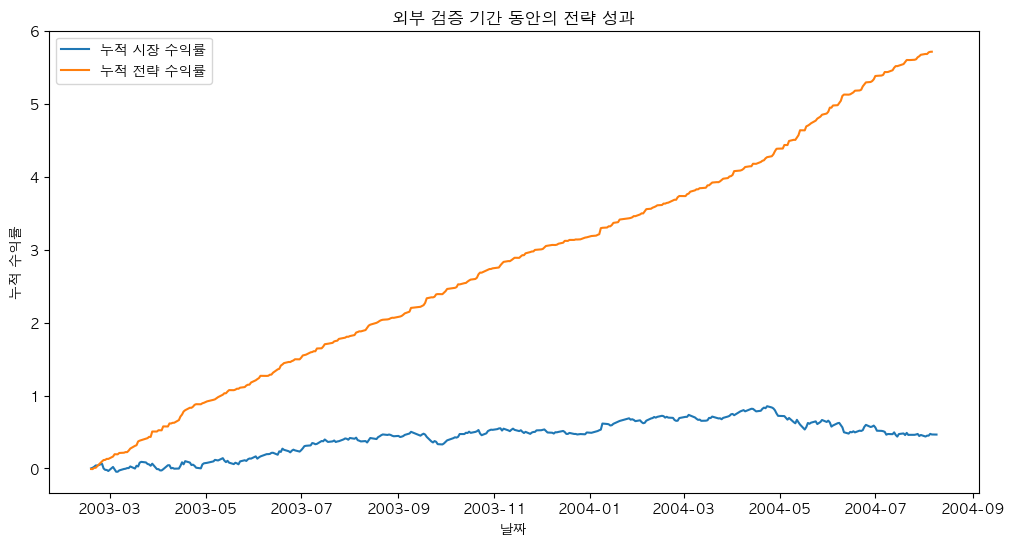

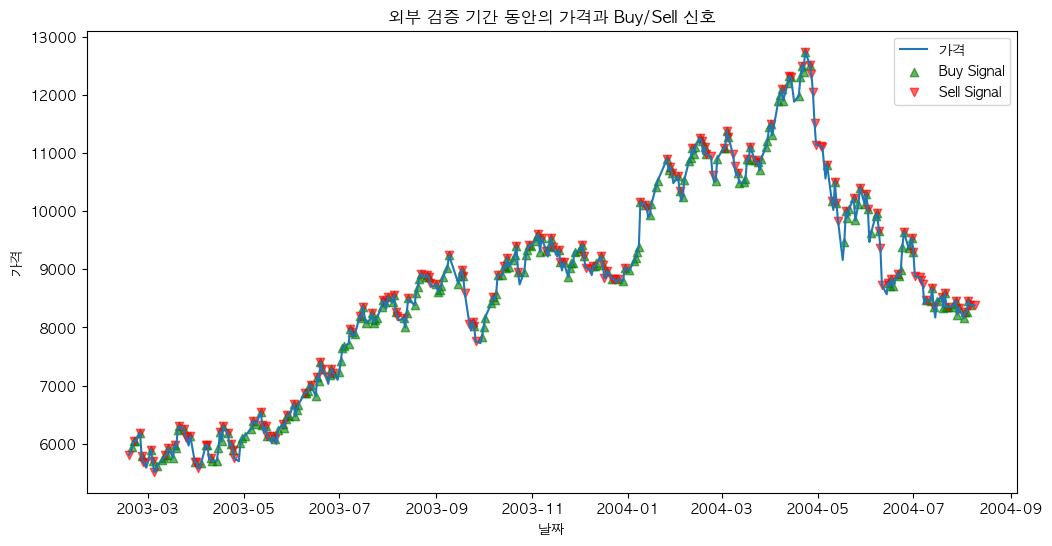

Buy Signal 예시:
Date
2003-02-19    100.000000
2003-02-20    100.000000
2003-02-21     91.666667
2003-02-24     93.750000
2003-02-25     27.272727
Name: 삼성전자, dtype: float64
Sell Signal 예시:
Date
2003-02-17    1.0
2003-02-20    1.0
2003-02-24    1.0
2003-02-25    1.0
2003-02-26    1.0
Name: 삼성전자, dtype: float64
외부 검증 기간 동안의 전략 총 수익률: 5.7208
외부 검증 기간 동안의 시장 총 수익률: 0.4646


In [97]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, gp
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import warnings
import copy  # 추가: deepcopy 사용을 위해 import

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (필요 시 주석 해제)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

class GeneticProgrammingTrader:
    def __init__(self, price_df, factor_df, training_years=5, selection_years=5, out_sample_years=1, days_per_year=365):
        """
        초기화 메서드
        :param price_df: 주가 데이터 DataFrame
        :param factor_df: 팩터 데이터 DataFrame
        :param training_years: 학습 기간 (년)
        :param selection_years: 선택 기간 (년)
        :param out_sample_years: 외부 검증 기간 (년)
        :param days_per_year: 연도당 일수
        """
        self.price_df = price_df
        self.factor_df = factor_df
        self.training_years = training_years
        self.selection_years = selection_years
        self.out_sample_years = out_sample_years
        self.days_per_year = days_per_year
        self.setup_data()
        self.setup_gp()
    
    def setup_data(self):
        """
        데이터를 학습, 선택, 외부 검증 기간으로 분할
        """
        total_days = len(self.price_df)
        training_days = self.training_years * self.days_per_year
        selection_days = self.selection_years * self.days_per_year
        out_sample_days = self.out_sample_years * self.days_per_year
        
        if total_days < training_days + selection_days + out_sample_days:
            raise ValueError(f"데이터가 충분히 길지 않습니다. 최소 {self.training_years + self.selection_years + self.out_sample_years}년의 데이터가 필요합니다.")
        
        self.training_df = self.price_df.iloc[:training_days]
        self.selection_df = self.price_df.iloc[training_days:training_days + selection_days]
        self.out_sample_df = self.price_df.iloc[training_days + selection_days:training_days + selection_days + out_sample_days]
        
        self.training_factors = self.factor_df.iloc[:training_days]
        self.selection_factors = self.factor_df.iloc[training_days:training_days + selection_days]
        self.out_sample_factors = self.factor_df.iloc[training_days + selection_days:training_days + selection_days + out_sample_days]
        
        # 학습 및 선택 기간을 결합하여 GP 진화에 사용
        self.combined_price = pd.concat([self.training_df, self.selection_df])
        self.combined_factors = pd.concat([self.training_factors, self.selection_factors])
        
        # 외부 검증 데이터
        self.out_sample_price = self.out_sample_df['삼성전자']
        self.out_sample_factors = self.out_sample_factors
    
    def setup_gp(self):
        """
        GP 프리미티브 및 DEAP 툴박스 설정
        """
        # 3-2. 연산자 및 터미널 집합 정의 (타이핑된 GP 사용)
        # 입력 타입: pd.Series, int; 출력 타입: pd.Series
        self.pset = gp.PrimitiveSetTyped("MAIN", [pd.Series, int], pd.Series)
        self.pset.renameArguments(ARG0='price', ARG1='constant')
        
        # Level 1: Boolean operators and functions
        def if_then_else(condition, out1, out2):
            return pd.Series(np.where(condition > 0, out1, out2), index=condition.index)        
        
        def and_op(a, b):
            return np.logical_and(a > 0, b > 0).astype(float)
        
        def or_op(a, b):
            return np.logical_or(a > 0, b > 0).astype(float)
        
        self.pset.addPrimitive(and_op, [pd.Series, pd.Series], pd.Series)
        self.pset.addPrimitive(or_op, [pd.Series, pd.Series], pd.Series)
        
        # Level 2: Relational operators
        def greater_than(series, threshold):
            return (series > threshold).astype(float)
        
        def less_than(series, threshold):
            return (series < threshold).astype(float)
        
        self.pset.addPrimitive(greater_than, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(less_than, [pd.Series, int], pd.Series)
        
        # Level 3: Real functions
        def avg(series, days):
            return series.rolling(window=int(days)).mean()
        
        def max_func(series, days):
            return series.rolling(window=int(days)).max()
        
        def min_func(series, days):
            return series.rolling(window=int(days)).min()
        
        def median(series, days):
            return series.rolling(window=int(days)).median()
        
        def lag(series, days):
            return series.shift(int(days))
        
        def volatility(series, days):
            return series.rolling(window=int(days)).std()
        
        def rsi(series, period):
            delta = series.diff()
            up = delta.clip(lower=0)
            down = -1 * delta.clip(upper=0)
            gain = up.rolling(window=int(period)).mean()
            loss = down.rolling(window=int(period)).mean()
            RS = gain / loss
            RSI = 100 - (100 / (1 + RS))
            return RSI.fillna(0)
        
        self.pset.addPrimitive(avg, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(max_func, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(min_func, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(median, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(lag, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(volatility, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(rsi, [pd.Series, int], pd.Series)
        
        # Level 4: Real variables (Terminals)
        self.pset.addTerminal(1.0, float)          # Days의 값 중 하나
        self.pset.addTerminal(-1.0, float)         # Pr의 값 중 하나
        self.pset.addTerminal(0.0, float)
        self.pset.addTerminal(0.5, float)
        
        # Integer terminals
        self.pset.addTerminal(0, int)
        self.pset.addTerminal(1, int)
        self.pset.addTerminal(2, int)
        self.pset.addTerminal(3, int)
        self.pset.addTerminal(5, int)
        self.pset.addTerminal(10, int)
        
        # Boolean terminals
        # self.pset.addTerminal(True, bool)
        # self.pset.addTerminal(False, bool)
        
        # Ephemeral constants (무작위 float 생성)
        #self.pset.addEphemeralConstant("rand_float", lambda: random.uniform(-10, 10), float)
        
        # 추가: float 연산자 등록 (이름 변경 후)
        def float_add(a, b):
            return a + b
        
        def float_subtract(a, b):
            return a - b
        
        def float_multiply(a, b):
            return a * b
        
        def float_divide(a, b):
            return a / b if b != 0 else 1.0
        
        self.pset.addPrimitive(float_add, [float, float], float)
        self.pset.addPrimitive(float_subtract, [float, float], float)
        self.pset.addPrimitive(float_multiply, [float, float], float)
        self.pset.addPrimitive(float_divide, [float, float], float)
        
        # **추가: int 타입을 반환하는 간단한 프리미티브 함수 추가**
        def identity_int(x):
            return x
        
        self.pset.addPrimitive(identity_int, [int], int)
        
        # DEAP 설정
        creator.create('FitnessMax', base.Fitness, weights=(1.0,))
        creator.create('Individual', list, fitness=creator.FitnessMax)
        
        self.toolbox = base.Toolbox()
        
        # 개별 트리 생성기 등록
        self.toolbox.register('expr_buy', gp.genHalfAndHalf, pset=self.pset, min_=1, max_=3)
        self.toolbox.register('expr_sell', gp.genHalfAndHalf, pset=self.pset, min_=1, max_=3)
        
        # 개별 생성 함수 등록
        def create_individual():
            # 개체 내의 표현식을 PrimitiveTree로 변환하여 포함
            return creator.Individual([
                gp.PrimitiveTree(self.toolbox.expr_buy()),
                gp.PrimitiveTree(self.toolbox.expr_sell())
            ])
        
        self.toolbox.register('individual', create_individual)
        self.toolbox.register('population', tools.initRepeat, list, self.toolbox.individual)
        
        self.toolbox.register('compile', gp.compile, pset=self.pset)
        self.toolbox.register('select', tools.selTournament, tournsize=3)
        
        # 'expr_mut'를 먼저 등록해야 합니다.
        self.toolbox.register('expr_mut', gp.genFull, pset=self.pset, min_=0, max_=2)
        
        # 'mutate' 등록
        self.toolbox.register('mutate', gp.mutUniform, expr=self.toolbox.expr_mut, pset=self.pset)
        
        # 'mate' 등록
        self.toolbox.register('mate', gp.cxOnePoint)
        
        # 교차 및 돌연변이 함수 수정
        def mate_individuals(ind1, ind2):
            # ind1과 ind2의 각 표현식은 이미 PrimitiveTree 객체임
            self.toolbox.mate(ind1[0], ind2[0])
            self.toolbox.mate(ind1[1], ind2[1])
            del ind1.fitness.values
            del ind2.fitness.values
            return ind1, ind2
        
        def mutate_individual(individual):
            self.toolbox.mutate(individual[0])
            self.toolbox.mutate(individual[1])
            del individual.fitness.values
            return individual,
        
        # toolbox에 커스텀 교차 및 돌연변이 등록
        self.toolbox.register('mate_custom', mate_individuals)
        self.toolbox.register('mutate_custom', mutate_individual)
        
        # **프리미티브 등록 상태 확인 (디버깅 용)**
        print("Primitives by type after setup_gp:")
        for typ, prims in self.pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
    
    def evaluate_individual(self, individual, price_series, factor_df):
        """
        개체의 적합도를 평가하는 함수
        :param individual: 개체 (buy_expr, sell_expr)
        :param price_series: 주가 시리즈
        :param factor_df: 팩터 데이터프레임
        :return: 적합도 튜플
        """
        buy_expr, sell_expr = individual
        buy_func = self.toolbox.compile(expr=buy_expr)
        sell_func = self.toolbox.compile(expr=sell_expr)
        
        try:
            # 트리 내의 int 상수를 사용하도록 수정
            buy_signal = buy_func(price_series, 1)    # 정수 상수
            sell_signal = sell_func(price_series, -1) # 정수 상수
            
            # ensure buy_signal and sell_signal are pd.Series
            buy_signal = pd.Series(buy_signal, index=price_series.index) if isinstance(buy_signal, np.ndarray) else buy_signal
            sell_signal = pd.Series(sell_signal, index=price_series.index) if isinstance(sell_signal, np.ndarray) else sell_signal
            
            combined_signal = pd.Series(0, index=price_series.index)
            combined_signal[buy_signal > 0] = 1
            combined_signal[sell_signal > 0] = -1
            
            returns = price_series.pct_change().dropna()
            
            combined_signal = combined_signal.shift(1).dropna()
            returns = returns.loc[combined_signal.index]
            
            if len(combined_signal) != len(returns):
                raise ValueError(f"Signal length {len(combined_signal)} does not match returns length {len(returns)}.")
            
            strategy_returns = combined_signal * returns
        
            trading_cost = 0.001
            trades = combined_signal.diff().fillna(0) != 0
            strategy_returns[trades] -= trading_cost
        
            factors = factor_df.loc[strategy_returns.index]
            factors = factors.dropna()
        
            if factors.empty or strategy_returns.empty:
                raise ValueError("Either factors or strategy returns are empty after alignment.")
        
            strategy_returns = strategy_returns.loc[factors.index]
        
            X = factors[['MKT', 'SMB', 'HML', 'MOM']]
            y = strategy_returns - 0.02 / 252
            X = add_constant(X)
        
            model = OLS(y, X).fit()
            alpha = model.params['const']
            t_stat = model.tvalues['const']
            
            if t_stat > 2:
                return alpha,
            else:
                return -np.inf,
            
        except Exception as e:
            print(f"Exception occurred: {e}, buy expression: {buy_expr}, sell expression: {sell_expr}")
            return -np.inf,
    
    def run_evolution(self, population_size=500, generations=30, cxpb=0.7, mutpb=0.2):
        """
        유전 알고리즘을 실행하는 메서드
        :param population_size: 인구 크기
        :param generations: 세대 수
        :param cxpb: 교차 확률
        :param mutpb: 돌연변이 확률
        :return: 최종 인구
        """
        # 초기 인구 생성
        population = self.toolbox.population(n=population_size)
        
        print("유전 알고리즘을 시작합니다...")
        
        # 프리미티브 등록 상태 확인 (디버깅 용)
        print("Primitives by type during run_evolution:")
        for typ, prims in self.pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
        
        # 초기 개체의 적합도 평가
        for ind in population:
            ind.fitness.values = self.evaluate_individual(ind, self.combined_price['삼성전자'], self.combined_factors)
        
        # 진화 과정
        for gen in range(1, generations + 1):
            print(f"-- 세대 {gen} --")
            offspring = self.toolbox.select(population, len(population))
            offspring = list(map(copy.deepcopy, offspring))  # tools.clone 대신 copy.deepcopy 사용
        
            # Apply crossover
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if random.random() < cxpb:
                    self.toolbox.mate_custom(child1, child2)
        
            # Apply mutation
            for mutant in offspring:
                if random.random() < mutpb:
                    self.toolbox.mutate_custom(mutant)
        
            # Evaluate the individuals with invalid fitness
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            for ind in invalid_ind:
                ind.fitness.values = self.evaluate_individual(ind, self.combined_price['삼성전자'], self.combined_factors)
        
            population[:] = offspring
        
            # 상위 개체 출력
            top_ind = tools.selBest(population, 1)[0]
            buy_tree = top_ind[0]
            sell_tree = top_ind[1]
            print(f"최고의 개체 Buy Expression: {buy_tree}")
            print(f"최고의 개체 Sell Expression: {sell_tree}")
            print(f"적합도: {top_ind.fitness.values}")
        
        print("-- 최종 결과 --")
        best_ind = tools.selBest(population, 1)[0]
        buy_tree = best_ind[0]
        sell_tree = best_ind[1]
        print(f"최고의 개체 Buy Expression: {buy_tree}")
        print(f"최고의 개체 Sell Expression: {sell_tree}")
        print(f"적합도: {best_ind.fitness.values}")
        
        self.best_individual = best_ind
        return population
    
    def evaluate_out_of_sample(self):
        """
        외부 검증 기간을 사용하여 최고의 개체의 성과를 평가하고 시각화
        """
        if not hasattr(self, 'best_individual'):
            raise AttributeError("먼저 유전 알고리즘을 실행하여 최고 개체를 선택해야 합니다.")
        
        best_ind = self.best_individual
        buy_tree = best_ind[0]
        sell_tree = best_ind[1]
        
        # 최적의 거래 규칙 외부 검증
        buy_func = self.toolbox.compile(expr=buy_tree)
        sell_func = self.toolbox.compile(expr=sell_tree)
    
        buy_signal = buy_func(self.out_sample_price, 1)    # 정수 상수
        sell_signal = sell_func(self.out_sample_price, -1) # 정수 상수
    
        # ensure buy_signal and sell_signal are pd.Series
        buy_signal = pd.Series(buy_signal, index=self.out_sample_price.index) if isinstance(buy_signal, np.ndarray) else buy_signal
        sell_signal = pd.Series(sell_signal, index=self.out_sample_price.index) if isinstance(sell_signal, np.ndarray) else sell_signal
    
        # Buy/Sell 신호를 1, -1로 변환
        combined_signal = pd.Series(0, index=self.out_sample_price.index)
        combined_signal[buy_signal > 0] = 1
        combined_signal[sell_signal > 0] = -1
    
        # 다음날 수익률에 신호 적용
        returns = self.out_sample_price.pct_change().dropna()
        combined_signal = combined_signal.shift(1).dropna()
        returns = returns.loc[combined_signal.index]
    
        if len(combined_signal) != len(returns):
            raise ValueError(f"Signal length {len(combined_signal)} does not match returns length {len(returns)}.")
    
        strategy_returns = combined_signal * returns
    
        # 거래 비용 고려 (예: 0.1%)
        trading_cost = 0.001
        trades = combined_signal.diff().fillna(0) != 0
        strategy_returns[trades] -= trading_cost
    
        # 누적 시장 수익률 및 전략 수익률 시각화
        plt.figure(figsize=(12,6))
        plt.plot(self.out_sample_price.index, np.cumsum(self.out_sample_price.pct_change().fillna(0)), label='누적 시장 수익률')
        plt.plot(self.out_sample_price.index[:-1], np.cumsum(strategy_returns), label='누적 전략 수익률')
        plt.legend()
        plt.title('외부 검증 기간 동안의 전략 성과')
        plt.xlabel('날짜')
        plt.ylabel('누적 수익률')
        plt.show()
    
        # Buy/Sell 신호 시각화
        plt.figure(figsize=(12,6))
        plt.plot(self.out_sample_price.index, self.out_sample_price, label='가격')
        plt.scatter(buy_signal.index[buy_signal > 0], self.out_sample_price[buy_signal > 0], marker='^', color='g', label='Buy Signal', alpha=0.6)
        plt.scatter(sell_signal.index[sell_signal > 0], self.out_sample_price[sell_signal > 0], marker='v', color='r', label='Sell Signal', alpha=0.6)
        plt.legend()
        plt.title('외부 검증 기간 동안의 가격과 Buy/Sell 신호')
        plt.xlabel('날짜')
        plt.ylabel('가격')
        plt.show()
    
        # Buy/Sell 신호 표출
        print("Buy Signal 예시:")
        print(buy_signal[buy_signal > 0].head())
    
        print("Sell Signal 예시:")
        print(sell_signal[sell_signal > 0].head())
    
        # 전략 수익률 요약
        total_strategy_return = strategy_returns.sum()
        total_market_return = self.out_sample_price.pct_change().sum()
        print(f"외부 검증 기간 동안의 전략 총 수익률: {total_strategy_return:.4f}")
        print(f"외부 검증 기간 동안의 시장 총 수익률: {total_market_return:.4f}")
    
    def plot_primitives(self):
        """
        등록된 프리미티브를 출력하는 메서드
        """
        print("Primitives by type:")
        for typ, prims in self.pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
    
    def summarize_population(self, population, top=5):
        """
        현재 인구의 상위 개체들을 요약하는 메서드
        :param population: 인구 리스트
        :param top: 요약할 상위 개체 수
        """
        top_inds = tools.selBest(population, top)
        print(f"상위 {top} 개체:")
        for i, ind in enumerate(top_inds, 1):
            buy_tree = ind[0]
            sell_tree = ind[1]
            fitness = ind.fitness.values
            print(f"{i}. Buy: {buy_tree}, Sell: {sell_tree}, Fitness: {fitness}")

# 사용 예시
def main():
    # 1. 데이터 생성 및 분할
    # def generate_data():
    #     # 날짜 생성: 11년 (4018일 기준 약 11*365)
    #     dates = pd.date_range(start='2012-01-01', periods=4018, freq='D')  # 11년
    #     # 가격 데이터 생성: 무작위 누적합
    #     price_df = pd.DataFrame({
    #         '삼성전자': np.random.randn(len(dates)).cumsum() + 100  # 임의의 주가 데이터
    #     }, index=dates)
        
    #     # 팩터 데이터 생성: 무작위 값
    #     factor_df = pd.DataFrame({
    #         'MKT': np.random.randn(len(dates)),
    #         'SMB': np.random.randn(len(dates)),
    #         'HML': np.random.randn(len(dates)),
    #         'MOM': np.random.randn(len(dates))
    #     }, index=dates)
        
    #     return price_df, factor_df
    
    # price_df, factor_df = generate_data()
    
    # 2. GeneticProgrammingTrader 클래스 인스턴스 생성
    gp_trader = GeneticProgrammingTrader(price_df, factor_df)
    
    # 3. 프리미티브 확인 (옵션)
    gp_trader.plot_primitives()
    
    # 4. 유전 알고리즘 실행
    population = gp_trader.run_evolution(population_size=500, generations=10, cxpb=0.7, mutpb=0.2)
    
    # 5. 상위 개체 요약 (옵션)
    gp_trader.summarize_population(population, top=5)
    
    # 6. 외부 검증 수행
    gp_trader.evaluate_out_of_sample()

if __name__ == "__main__":
    main()

In [101]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, gp
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import warnings
import copy  # 추가: deepcopy 사용을 위해 import

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (필요 시 주석 해제)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

class GeneticProgrammingTrader:
    def __init__(self, price_df, factor_df, training_years=5, selection_years=5, out_sample_years=1, days_per_year=365):
        """
        초기화 메서드
        :param price_df: 주가 데이터 DataFrame
        :param factor_df: 팩터 데이터 DataFrame
        :param training_years: 학습 기간 (년)
        :param selection_years: 선택 기간 (년)
        :param out_sample_years: 외부 검증 기간 (년)
        :param days_per_year: 연도당 일수
        """
        self.price_df = price_df
        self.factor_df = factor_df
        self.training_years = training_years
        self.selection_years = selection_years
        self.out_sample_years = out_sample_years
        self.days_per_year = days_per_year
        self.setup_data()
        self.setup_gp()
    
    def setup_data(self):
        """
        데이터를 학습, 선택, 외부 검증 기간으로 분할
        """
        total_days = len(self.price_df)
        training_days = self.training_years * self.days_per_year
        selection_days = self.selection_years * self.days_per_year
        out_sample_days = self.out_sample_years * self.days_per_year
        
        if total_days < training_days + selection_days + out_sample_days:
            raise ValueError(f"데이터가 충분히 길지 않습니다. 최소 {self.training_years + self.selection_years + self.out_sample_years}년의 데이터가 필요합니다.")
        
        self.training_df = self.price_df.iloc[:training_days]
        self.selection_df = self.price_df.iloc[training_days:training_days + selection_days]
        self.out_sample_df = self.price_df.iloc[training_days + selection_days:training_days + selection_days + out_sample_days]
        
        self.training_factors = self.factor_df.iloc[:training_days]
        self.selection_factors = self.factor_df.iloc[training_days:training_days + selection_days]
        self.out_sample_factors = self.factor_df.iloc[training_days + selection_days:training_days + selection_days + out_sample_days]
        
        # 학습 및 선택 기간을 결합하여 GP 진화에 사용
        self.combined_price = pd.concat([self.training_df, self.selection_df])
        self.combined_factors = pd.concat([self.training_factors, self.selection_factors])
        
        # 외부 검증 데이터
        self.out_sample_price = self.out_sample_df['삼성전자']
        self.out_sample_factors = self.out_sample_factors
    
    def setup_gp(self):
        """
        GP 프리미티브 및 DEAP 툴박스 설정
        """
        # 3-2. 연산자 및 터미널 집합 정의 (타이핑된 GP 사용)
        # 입력 타입: pd.Series, int; 출력 타입: pd.Series
        self.pset = gp.PrimitiveSetTyped("MAIN", [pd.Series, int], pd.Series)
        self.pset.renameArguments(ARG0='price', ARG1='constant')
        
        # Level 1: Boolean operators and functions
        def if_then_else(condition):
            return pd.Series(np.where(condition > 0, 1, 0), index=condition.index)    
        
        def and_op(a, b):
            return pd.Series(np.logical_and(a > 0, b > 0).astype(float), index=a.index)

        def or_op(a, b):
            return pd.Series(np.logical_or(a > 0, b > 0).astype(float), index=a.index)

        self.pset.addPrimitive(if_then_else, [pd.Series], pd.Series, name="if_then_else")
        self.pset.addPrimitive(and_op, [pd.Series, pd.Series], pd.Series, name="and")
        self.pset.addPrimitive(or_op, [pd.Series, pd.Series], pd.Series, name="or")
        
        # Level 2: Relational operators
        def greater_than(series, threshold):
            return (series > threshold).astype(float)
        
        def less_than(series, threshold):
            return (series < threshold).astype(float)
        
        self.pset.addPrimitive(greater_than, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(less_than, [pd.Series, int], pd.Series)
        
        # Level 3: Real functions
        def avg(series, days):
            return series.rolling(window=int(days)).mean()
        
        def max_func(series, days):
            return series.rolling(window=int(days)).max()
        
        def min_func(series, days):
            return series.rolling(window=int(days)).min()
        
        def median(series, days):
            return series.rolling(window=int(days)).median()
        
        def lag(series, days):
            return series.shift(int(days))
        
        def volatility(series, days):
            return series.rolling(window=int(days)).std()
        
        def rsi(series, period):
            delta = series.diff()
            up = delta.clip(lower=0)
            down = -1 * delta.clip(upper=0)
            gain = up.rolling(window=int(period)).mean()
            loss = down.rolling(window=int(period)).mean()
            RS = gain / loss
            RSI = 100 - (100 / (1 + RS))
            return RSI.fillna(0)
        
        self.pset.addPrimitive(avg, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(max_func, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(min_func, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(median, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(lag, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(volatility, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(rsi, [pd.Series, int], pd.Series)
        
        # Level 4: Real variables (Terminals)
        self.pset.addTerminal(1.0, float)          # Days의 값 중 하나
        self.pset.addTerminal(-1.0, float)         # Pr의 값 중 하나
        self.pset.addTerminal(0.0, float)
        self.pset.addTerminal(0.5, float)
        
        # Integer terminals
        self.pset.addTerminal(0, int)
        self.pset.addTerminal(1, int)
        self.pset.addTerminal(2, int)
        self.pset.addTerminal(3, int)
        self.pset.addTerminal(5, int)
        self.pset.addTerminal(10, int)
        
        # Boolean terminals
        # self.pset.addTerminal(True, bool)
        # self.pset.addTerminal(False, bool)
        
        # Ephemeral constants (무작위 float 생성)
        #self.pset.addEphemeralConstant("rand_float", lambda: random.uniform(-10, 10), float)
        
        # 추가: float 연산자 등록 (이름 변경 후)
        def float_add(a, b):
            return a + b
        
        def float_subtract(a, b):
            return a - b
        
        def float_multiply(a, b):
            return a * b
        
        def float_divide(a, b):
            return a / b if b != 0 else 1.0
        
        self.pset.addPrimitive(float_add, [float, float], float)
        self.pset.addPrimitive(float_subtract, [float, float], float)
        self.pset.addPrimitive(float_multiply, [float, float], float)
        self.pset.addPrimitive(float_divide, [float, float], float)
        
        # **추가: int 타입을 반환하는 간단한 프리미티브 함수 추가**
        def identity_int(x):
            return x
        
        self.pset.addPrimitive(identity_int, [int], int)
        
        # DEAP 설정
        creator.create('FitnessMax', base.Fitness, weights=(1.0,))
        creator.create('Individual', list, fitness=creator.FitnessMax)
        
        self.toolbox = base.Toolbox()

        # Custom initialization function for a single tree
        def init_tree():
            prim_list = [self.pset.primitives[pd.Series][i] for i in range(len(self.pset.primitives[pd.Series]))]
            root = random.choice([p for p in prim_list if p.name in ["if_then_else", "and", "or"]])
            if root.name == "if_then_else":
                expr = gp.PrimitiveTree([root, gp.genHalfAndHalf(self.pset, min_=1, max_=3)])
            else:  # "and" or "or"
                expr = gp.PrimitiveTree([root,
                        gp.genHalfAndHalf(self.pset, min_=1, max_=3),
                        gp.genHalfAndHalf(self.pset, min_=1, max_=3)])
            return expr
        
        # 개별 트리 생성기 등록
        #self.toolbox.register('expr_buy', init_tree(), pset=self.pset, min_=1, max_=3)
        #self.toolbox.register('expr_sell', init_tree(), pset=self.pset, min_=1, max_=3)
        self.toolbox.register('expr_buy', init_tree)
        self.toolbox.register('expr_sell', init_tree)
        # 개별 생성 함수 등록
        def create_individual():
            # 개체 내의 표현식을 PrimitiveTree로 변환하여 포함
            return creator.Individual([
                self.toolbox.expr_buy(),
                self.toolbox.expr_sell()
            ])
        
        self.toolbox.register('individual', create_individual)
        self.toolbox.register('population', tools.initRepeat, list, self.toolbox.individual)
        
        self.toolbox.register('compile', gp.compile, pset=self.pset)
        self.toolbox.register('select', tools.selTournament, tournsize=3)
        
        # 'expr_mut'를 먼저 등록해야 합니다.
        self.toolbox.register('expr_mut', gp.genFull, pset=self.pset, min_=0, max_=2)
        
        # 'mutate' 등록
        self.toolbox.register('mutate', gp.mutUniform, expr=self.toolbox.expr_mut, pset=self.pset)
        
        # 'mate' 등록
        self.toolbox.register('mate', gp.cxOnePoint)
        
        # 교차 및 돌연변이 함수 수정
        def mate_individuals(ind1, ind2):
            # ind1과 ind2의 각 표현식은 이미 PrimitiveTree 객체임
            self.toolbox.mate(ind1[0], ind2[0])
            self.toolbox.mate(ind1[1], ind2[1])
            del ind1.fitness.values
            del ind2.fitness.values
            return ind1, ind2
        
        def mutate_individual(individual):
            self.toolbox.mutate(individual[0])
            self.toolbox.mutate(individual[1])
            del individual.fitness.values
            return individual,
        
        # toolbox에 커스텀 교차 및 돌연변이 등록
        self.toolbox.register('mate_custom', mate_individuals)
        self.toolbox.register('mutate_custom', mutate_individual)
        
        # **프리미티브 등록 상태 확인 (디버깅 용)**
        print("Primitives by type after setup_gp:")
        for typ, prims in self.pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
    
    def evaluate_individual(self, individual, price_series, factor_df):
        """
        개체의 적합도를 평가하는 함수
        :param individual: 개체 (buy_expr, sell_expr)
        :param price_series: 주가 시리즈
        :param factor_df: 팩터 데이터프레임
        :return: 적합도 튜플
        """
        buy_expr, sell_expr = individual
        
        # PrimitiveTree로 변환
        if isinstance(buy_expr, list):
            buy_expr = gp.PrimitiveTree(buy_expr)
        if isinstance(sell_expr, list):
            sell_expr = gp.PrimitiveTree(sell_expr)
        
        buy_func = self.toolbox.compile(expr=buy_expr)
        sell_func = self.toolbox.compile(expr=sell_expr)
        
        try:
            buy_signal = buy_func(price_series, 1)
            sell_signal = sell_func(price_series, 1)
            
            # ensure buy_signal and sell_signal are pd.Series
            buy_signal = pd.Series(buy_signal, index=price_series.index) if not isinstance(buy_signal, pd.Series) else buy_signal
            sell_signal = pd.Series(sell_signal, index=price_series.index) if not isinstance(sell_signal, pd.Series) else sell_signal
            
            combined_signal = pd.Series(0, index=price_series.index)
            combined_signal[buy_signal > 0] = 1
            combined_signal[sell_signal > 0] = -1
            
            returns = price_series.pct_change().dropna()
            
            combined_signal = combined_signal.shift(1).dropna()
            returns = returns.loc[combined_signal.index]
            
            if len(combined_signal) != len(returns):
                raise ValueError(f"Signal length {len(combined_signal)} does not match returns length {len(returns)}.")
            
            strategy_returns = combined_signal * returns
        
            trading_cost = 0.001
            trades = combined_signal.diff().fillna(0) != 0
            strategy_returns[trades] -= trading_cost
        
            factors = factor_df.loc[strategy_returns.index]
            factors = factors.dropna()
        
            if factors.empty or strategy_returns.empty:
                raise ValueError("Either factors or strategy returns are empty after alignment.")
        
            strategy_returns = strategy_returns.loc[factors.index]
        
            X = factors[['MKT', 'SMB', 'HML', 'MOM']]
            y = strategy_returns - 0.02 / 252
            X = add_constant(X)
        
            model = OLS(y, X).fit()
            alpha = model.params['const']
            t_stat = model.tvalues['const']
            
            if t_stat > 2:
                return alpha,
            else:
                return -np.inf,
            
        except Exception as e:
            print(f"Exception occurred: {e}, buy expression: {buy_expr}, sell expression: {sell_expr}")
            return -np.inf,
    
    def run_evolution(self, population_size=500, generations=30, cxpb=0.7, mutpb=0.2):
        """
        유전 알고리즘을 실행하는 메서드
        :param population_size: 인구 크기
        :param generations: 세대 수
        :param cxpb: 교차 확률
        :param mutpb: 돌연변이 확률
        :return: 최종 인구
        """
        # 초기 인구 생성
        population = self.toolbox.population(n=population_size)
        
        print("유전 알고리즘을 시작합니다...")
        
        # 프리미티브 등록 상태 확인 (디버깅 용)
        print("Primitives by type during run_evolution:")
        for typ, prims in self.pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
        
        # 초기 개체의 적합도 평가
        for ind in population:
            ind.fitness.values = self.evaluate_individual(ind, self.combined_price['삼성전자'], self.combined_factors)
        
        # 진화 과정
        for gen in range(1, generations + 1):
            print(f"-- 세대 {gen} --")
            offspring = self.toolbox.select(population, len(population))
            offspring = list(map(copy.deepcopy, offspring))  # tools.clone 대신 copy.deepcopy 사용
        
            # Apply crossover
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if random.random() < cxpb:
                    self.toolbox.mate_custom(child1, child2)
        
            # Apply mutation
            for mutant in offspring:
                if random.random() < mutpb:
                    self.toolbox.mutate_custom(mutant)
        
            # Evaluate the individuals with invalid fitness
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            for ind in invalid_ind:
                ind.fitness.values = self.evaluate_individual(ind, self.combined_price['삼성전자'], self.combined_factors)
        
            population[:] = offspring
        
            # 상위 개체 출력
            top_ind = tools.selBest(population, 1)[0]
            buy_tree = top_ind[0]
            sell_tree = top_ind[1]
            print(f"최고의 개체 Buy Expression: {buy_tree}")
            print(f"최고의 개체 Sell Expression: {sell_tree}")
            print(f"적합도: {top_ind.fitness.values}")
        
        print("-- 최종 결과 --")
        best_ind = tools.selBest(population, 1)[0]
        buy_tree = best_ind[0]
        sell_tree = best_ind[1]
        print(f"최고의 개체 Buy Expression: {buy_tree}")
        print(f"최고의 개체 Sell Expression: {sell_tree}")
        print(f"적합도: {best_ind.fitness.values}")
        
        self.best_individual = best_ind
        return population
    
    def evaluate_out_of_sample(self):
        """
        외부 검증 기간을 사용하여 최고의 개체의 성과를 평가하고 시각화
        """
        if not hasattr(self, 'best_individual'):
            raise AttributeError("먼저 유전 알고리즘을 실행하여 최고 개체를 선택해야 합니다.")
        
        best_ind = self.best_individual
        buy_tree = best_ind[0]
        sell_tree = best_ind[1]
        
        # 최적의 거래 규칙 외부 검증
        buy_func = self.toolbox.compile(expr=buy_tree)
        sell_func = self.toolbox.compile(expr=sell_tree)
    
        buy_signal = buy_func(self.out_sample_price, 1)    # 정수 상수
        sell_signal = sell_func(self.out_sample_price, -1) # 정수 상수
    
        # ensure buy_signal and sell_signal are pd.Series
        buy_signal = pd.Series(buy_signal, index=self.out_sample_price.index) if isinstance(buy_signal, np.ndarray) else buy_signal
        sell_signal = pd.Series(sell_signal, index=self.out_sample_price.index) if isinstance(sell_signal, np.ndarray) else sell_signal
    
        # Buy/Sell 신호를 1, -1로 변환
        combined_signal = pd.Series(0, index=self.out_sample_price.index)
        combined_signal[buy_signal > 0] = 1
        combined_signal[sell_signal > 0] = -1
    
        # 다음날 수익률에 신호 적용
        returns = self.out_sample_price.pct_change().dropna()
        combined_signal = combined_signal.shift(1).dropna()
        returns = returns.loc[combined_signal.index]
    
        if len(combined_signal) != len(returns):
            raise ValueError(f"Signal length {len(combined_signal)} does not match returns length {len(returns)}.")
    
        strategy_returns = combined_signal * returns
    
        # 거래 비용 고려 (예: 0.1%)
        trading_cost = 0.001
        trades = combined_signal.diff().fillna(0) != 0
        strategy_returns[trades] -= trading_cost
    
        # 누적 시장 수익률 및 전략 수익률 시각화
        plt.figure(figsize=(12,6))
        plt.plot(self.out_sample_price.index, np.cumsum(self.out_sample_price.pct_change().fillna(0)), label='누적 시장 수익률')
        plt.plot(self.out_sample_price.index[:-1], np.cumsum(strategy_returns), label='누적 전략 수익률')
        plt.legend()
        plt.title('외부 검증 기간 동안의 전략 성과')
        plt.xlabel('날짜')
        plt.ylabel('누적 수익률')
        plt.show()
    
        # Buy/Sell 신호 시각화
        plt.figure(figsize=(12,6))
        plt.plot(self.out_sample_price.index, self.out_sample_price, label='가격')
        plt.scatter(buy_signal.index[buy_signal > 0], self.out_sample_price[buy_signal > 0], marker='^', color='g', label='Buy Signal', alpha=0.6)
        plt.scatter(sell_signal.index[sell_signal > 0], self.out_sample_price[sell_signal > 0], marker='v', color='r', label='Sell Signal', alpha=0.6)
        plt.legend()
        plt.title('외부 검증 기간 동안의 가격과 Buy/Sell 신호')
        plt.xlabel('날짜')
        plt.ylabel('가격')
        plt.show()
    
        # Buy/Sell 신호 표출
        print("Buy Signal 예시:")
        print(buy_signal[buy_signal > 0].head())
    
        print("Sell Signal 예시:")
        print(sell_signal[sell_signal > 0].head())
    
        # 전략 수익률 요약
        total_strategy_return = strategy_returns.sum()
        total_market_return = self.out_sample_price.pct_change().sum()
        print(f"외부 검증 기간 동안의 전략 총 수익률: {total_strategy_return:.4f}")
        print(f"외부 검증 기간 동안의 시장 총 수익률: {total_market_return:.4f}")
    
    def plot_primitives(self):
        """
        등록된 프리미티브를 출력하는 메서드
        """
        print("Primitives by type:")
        for typ, prims in self.pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
    
    def summarize_population(self, population, top=5):
        """
        현재 인구의 상위 개체들을 요약하는 메서드
        :param population: 인구 리스트
        :param top: 요약할 상위 개체 수
        """
        top_inds = tools.selBest(population, top)
        print(f"상위 {top} 개체:")
        for i, ind in enumerate(top_inds, 1):
            buy_tree = ind[0]
            sell_tree = ind[1]
            fitness = ind.fitness.values
            print(f"{i}. Buy: {buy_tree}, Sell: {sell_tree}, Fitness: {fitness}")

# 사용 예시
def main():
    # 1. 데이터 생성 및 분할
    # def generate_data():
    #     # 날짜 생성: 11년 (4018일 기준 약 11*365)
    #     dates = pd.date_range(start='2012-01-01', periods=4018, freq='D')  # 11년
    #     # 가격 데이터 생성: 무작위 누적합
    #     price_df = pd.DataFrame({
    #         '삼성전자': np.random.randn(len(dates)).cumsum() + 100  # 임의의 주가 데이터
    #     }, index=dates)
        
    #     # 팩터 데이터 생성: 무작위 값
    #     factor_df = pd.DataFrame({
    #         'MKT': np.random.randn(len(dates)),
    #         'SMB': np.random.randn(len(dates)),
    #         'HML': np.random.randn(len(dates)),
    #         'MOM': np.random.randn(len(dates))
    #     }, index=dates)
        
    #     return price_df, factor_df
    
    # price_df, factor_df = generate_data()
    
    # 2. GeneticProgrammingTrader 클래스 인스턴스 생성
    gp_trader = GeneticProgrammingTrader(price_df, factor_df)
    
    # 3. 프리미티브 확인 (옵션)
    gp_trader.plot_primitives()
    
    # 4. 유전 알고리즘 실행
    population = gp_trader.run_evolution(population_size=500, generations=10, cxpb=0.7, mutpb=0.2)
    
    # 5. 상위 개체 요약 (옵션)
    gp_trader.summarize_population(population, top=5)
    
    # 6. 외부 검증 수행
    gp_trader.evaluate_out_of_sample()

if __name__ == "__main__":
    main()

Primitives by type after setup_gp:
Type <class 'pandas.core.series.Series'>: ['if_then_else', 'and', 'or', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
Primitives by type:
Type <class 'pandas.core.series.Series'>: ['if_then_else', 'and', 'or', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
유전 알고리즘을 시작합니다...
Primitives by type during run_evolution:
Type <class 'pandas.core.series.Series'>: ['if_then_else', 'and', 'or', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']


AttributeError: 'list' object has no attribute 'arity'

In [102]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, gp
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import warnings
import copy  # deepcopy 사용을 위해 import

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (필요 시 주석 해제)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

class GeneticProgrammingTrader:
    def __init__(self, price_df, factor_df, training_years=5, selection_years=5, out_sample_years=1, days_per_year=365):
        """
        초기화 메서드
        :param price_df: 주가 데이터 DataFrame
        :param factor_df: 팩터 데이터 DataFrame
        :param training_years: 학습 기간 (년)
        :param selection_years: 선택 기간 (년)
        :param out_sample_years: 외부 검증 기간 (년)
        :param days_per_year: 연도당 일수
        """
        self.price_df = price_df
        self.factor_df = factor_df
        self.training_years = training_years
        self.selection_years = selection_years
        self.out_sample_years = out_sample_years
        self.days_per_year = days_per_year
        self.setup_data()
        self.setup_gp()
    
    def setup_data(self):
        """
        데이터를 학습, 선택, 외부 검증 기간으로 분할
        """
        total_days = len(self.price_df)
        training_days = self.training_years * self.days_per_year
        selection_days = self.selection_years * self.days_per_year
        out_sample_days = self.out_sample_years * self.days_per_year
        
        if total_days < training_days + selection_days + out_sample_days:
            raise ValueError(f"데이터가 충분히 길지 않습니다. 최소 {self.training_years + self.selection_years + self.out_sample_years}년의 데이터가 필요합니다.")
        
        self.training_df = self.price_df.iloc[:training_days]
        self.selection_df = self.price_df.iloc[training_days:training_days + selection_days]
        self.out_sample_df = self.price_df.iloc[training_days + selection_days:training_days + selection_days + out_sample_days]
        
        self.training_factors = self.factor_df.iloc[:training_days]
        self.selection_factors = self.factor_df.iloc[training_days:training_days + selection_days]
        self.out_sample_factors = self.factor_df.iloc[training_days + selection_days:training_days + selection_days + out_sample_days]
        
        # 학습 및 선택 기간을 결합하여 GP 진화에 사용
        self.combined_price = pd.concat([self.training_df, self.selection_df])
        self.combined_factors = pd.concat([self.training_factors, self.selection_factors])
        
        # 외부 검증 데이터
        self.out_sample_price = self.out_sample_df['삼성전자']
        self.out_sample_factors = self.out_sample_factors
    
    def setup_gp(self):
        """
        GP 프리미티브 및 DEAP 툴박스 설정
        """
        # 단일 프리미티브 집합 정의
        self.pset = gp.PrimitiveSetTyped("MAIN", [pd.Series, int], pd.Series)
        self.pset.renameArguments(ARG0='price', ARG1='constant')
        
        # Level 1: Boolean operators and functions (루트 노드 전용)
        def if_then_else(condition):
            return pd.Series(np.where(condition > 0, 1, 0), index=condition.index)    
        
        def and_op(a, b):
            return pd.Series(np.logical_and(a > 0, b > 0).astype(float), index=a.index)

        def or_op(a, b):
            return pd.Series(np.logical_or(a > 0, b > 0).astype(float), index=a.index)

        self.pset.addPrimitive(if_then_else, [pd.Series], pd.Series, name="if_then_else")
        self.pset.addPrimitive(and_op, [pd.Series, pd.Series], pd.Series, name="and")
        self.pset.addPrimitive(or_op, [pd.Series, pd.Series], pd.Series, name="or")
        
        # Level 2: Relational operators
        def greater_than(series, threshold):
            return (series > threshold).astype(float)
        
        def less_than(series, threshold):
            return (series < threshold).astype(float)
        
        self.pset.addPrimitive(greater_than, [pd.Series, int], pd.Series, name="greater_than")
        self.pset.addPrimitive(less_than, [pd.Series, int], pd.Series, name="less_than")
        
        # Level 3: Real functions
        def avg(series, days):
            return series.rolling(window=int(days)).mean()
        
        def max_func(series, days):
            return series.rolling(window=int(days)).max()
        
        def min_func(series, days):
            return series.rolling(window=int(days)).min()
        
        def median(series, days):
            return series.rolling(window=int(days)).median()
        
        def lag(series, days):
            return series.shift(int(days))
        
        def volatility(series, days):
            return series.rolling(window=int(days)).std()
        
        def rsi(series, period):
            delta = series.diff()
            up = delta.clip(lower=0)
            down = -1 * delta.clip(upper=0)
            gain = up.rolling(window=int(period)).mean()
            loss = down.rolling(window=int(period)).mean()
            RS = gain / loss
            RSI = 100 - (100 / (1 + RS))
            return RSI.fillna(0)
        
        self.pset.addPrimitive(avg, [pd.Series, int], pd.Series, name="avg")
        self.pset.addPrimitive(max_func, [pd.Series, int], pd.Series, name="max_func")
        self.pset.addPrimitive(min_func, [pd.Series, int], pd.Series, name="min_func")
        self.pset.addPrimitive(median, [pd.Series, int], pd.Series, name="median")
        self.pset.addPrimitive(lag, [pd.Series, int], pd.Series, name="lag")
        self.pset.addPrimitive(volatility, [pd.Series, int], pd.Series, name="volatility")
        self.pset.addPrimitive(rsi, [pd.Series, int], pd.Series, name="rsi")
        
        # Level 4: Real variables (Terminals)
        self.pset.addTerminal(1.0, float)          # Days의 값 중 하나
        self.pset.addTerminal(-1.0, float)         # Pr의 값 중 하나
        self.pset.addTerminal(0.0, float)
        self.pset.addTerminal(0.5, float)
        
        # Integer terminals
        self.pset.addTerminal(0, int)
        self.pset.addTerminal(1, int)
        self.pset.addTerminal(2, int)
        self.pset.addTerminal(3, int)
        self.pset.addTerminal(5, int)
        self.pset.addTerminal(10, int)
        
        # 추가: float 연산자 등록 (이름 변경 후)
        def float_add(a, b):
            return a + b
        
        def float_subtract(a, b):
            return a - b
        
        def float_multiply(a, b):
            return a * b
        
        def float_divide(a, b):
            return a / b if b != 0 else 1.0
        
        self.pset.addPrimitive(float_add, [float, float], float, name="float_add")
        self.pset.addPrimitive(float_subtract, [float, float], float, name="float_subtract")
        self.pset.addPrimitive(float_multiply, [float, float], float, name="float_multiply")
        self.pset.addPrimitive(float_divide, [float, float], float, name="float_divide")
        
        # **추가: int 타입을 반환하는 간단한 프리미티브 함수 추가**
        def identity_int(x):
            return x
        
        self.pset.addPrimitive(identity_int, [int], int, name="identity_int")
        
        # DEAP 설정
        creator.create('FitnessMax', base.Fitness, weights=(1.0,))
        creator.create('Individual', list, fitness=creator.FitnessMax)
        
        self.toolbox = base.Toolbox()

        # Custom initialization function for a single tree with root primitives
        def init_tree():
            # 루트 노드 프리미티브만 선택
            root_primitives = [p for p in self.pset.primitives[pd.Series] if p.name in ["if_then_else", "and", "or"]]
            root = random.choice(root_primitives)
            # 전체 트리 생성
            expr = gp.genHalfAndHalf(pset=self.pset, min_=1, max_=3)
            # 트리의 루트 노드를 선택한 루트 프리미티브로 교체
            expr[0] = root
            return gp.PrimitiveTree(expr)
        
        # 개별 트리 생성기 등록
        self.toolbox.register('expr_buy', init_tree)
        self.toolbox.register('expr_sell', init_tree)
        
        # 개별 생성 함수 등록
        def create_individual():
            # 개체 내의 표현식을 PrimitiveTree로 변환하여 포함
            return creator.Individual([
                self.toolbox.expr_buy(),
                self.toolbox.expr_sell()
            ])
        
        self.toolbox.register('individual', create_individual)
        self.toolbox.register('population', tools.initRepeat, list, self.toolbox.individual)
        
        self.toolbox.register('compile', gp.compile, pset=self.pset)
        self.toolbox.register('select', tools.selTournament, tournsize=3)
        
        # 'expr_mut' 등록
        self.toolbox.register('expr_mut', gp.genFull, pset=self.pset, min_=0, max_=2)
        
        # 'mutate' 등록
        self.toolbox.register('mutate', gp.mutUniform, expr=self.toolbox.expr_mut, pset=self.pset)
        
        # 'mate' 등록
        self.toolbox.register('mate', gp.cxOnePoint)
        
        # 교차 및 돌연변이 함수 수정
        def mate_individuals(ind1, ind2):
            # ind1과 ind2의 각 표현식은 이미 PrimitiveTree 객체임
            self.toolbox.mate(ind1[0], ind2[0])
            self.toolbox.mate(ind1[1], ind2[1])
            del ind1.fitness.values
            del ind2.fitness.values
            return ind1, ind2
        
        def mutate_individual(individual):
            self.toolbox.mutate(individual[0])
            self.toolbox.mutate(individual[1])
            del individual.fitness.values
            return individual,
        
        # toolbox에 커스텀 교차 및 돌연변이 등록
        self.toolbox.register('mate_custom', mate_individuals)
        self.toolbox.register('mutate_custom', mutate_individual)
        
        # **프리미티브 등록 상태 확인 (디버깅 용)**
        print("Primitives by type after setup_gp:")
        for typ, prims in self.pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
    
    def evaluate_individual(self, individual, price_series, factor_df):
        """
        개체의 적합도를 평가하는 함수
        :param individual: 개체 (buy_expr, sell_expr)
        :param price_series: 주가 시리즈
        :param factor_df: 팩터 데이터프레임
        :return: 적합도 튜플
        """
        buy_expr, sell_expr = individual
        buy_func = self.toolbox.compile(expr=buy_expr)
        sell_func = self.toolbox.compile(expr=sell_expr)
        
        try:
            # 트리 내의 int 상수를 사용하도록 수정
            buy_signal = buy_func(price_series, 1)
            sell_signal = sell_func(price_series, 1)  # -1 대신 1 사용            
            # ensure buy_signal and sell_signal are pd.Series
            buy_signal = pd.Series(buy_signal, index=price_series.index) if isinstance(buy_signal, np.ndarray) else buy_signal
            sell_signal = pd.Series(sell_signal, index=price_series.index) if isinstance(sell_signal, np.ndarray) else sell_signal
            
            combined_signal = pd.Series(0, index=price_series.index)
            combined_signal[buy_signal > 0] = 1
            combined_signal[sell_signal > 0] = -1
            
            returns = price_series.pct_change().dropna()
            
            combined_signal = combined_signal.shift(1).dropna()
            returns = returns.loc[combined_signal.index]
            
            if len(combined_signal) != len(returns):
                raise ValueError(f"Signal length {len(combined_signal)} does not match returns length {len(returns)}.")
            
            strategy_returns = combined_signal * returns
        
            trading_cost = 0.001
            trades = combined_signal.diff().fillna(0) != 0
            strategy_returns[trades] -= trading_cost
        
            factors = factor_df.loc[strategy_returns.index]
            factors = factors.dropna()
        
            if factors.empty or strategy_returns.empty:
                raise ValueError("Either factors or strategy returns are empty after alignment.")
        
            strategy_returns = strategy_returns.loc[factors.index]
        
            X = factors[['MKT', 'SMB', 'HML', 'MOM']]
            y = strategy_returns - 0.02 / 252
            X = add_constant(X)
        
            model = OLS(y, X).fit()
            alpha = model.params['const']
            t_stat = model.tvalues['const']
            
            if t_stat > 2:
                return alpha,
            else:
                return -np.inf,
            
        except Exception as e:
            print(f"Exception occurred: {e}, buy expression: {buy_expr}, sell expression: {sell_expr}")
            return -np.inf,
    
    def run_evolution(self, population_size=500, generations=30, cxpb=0.7, mutpb=0.2):
        """
        유전 알고리즘을 실행하는 메서드
        :param population_size: 인구 크기
        :param generations: 세대 수
        :param cxpb: 교차 확률
        :param mutpb: 돌연변이 확률
        :return: 최종 인구
        """
        # 초기 인구 생성
        population = self.toolbox.population(n=population_size)
        
        print("유전 알고리즘을 시작합니다...")
        
        # 프리미티브 등록 상태 확인 (디버깅 용)
        print("Primitives by type during run_evolution:")
        for typ, prims in self.pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
        
        # 초기 개체의 적합도 평가
        for ind in population:
            ind.fitness.values = self.evaluate_individual(ind, self.combined_price['삼성전자'], self.combined_factors)
        
        # 진화 과정
        for gen in range(1, generations + 1):
            print(f"-- 세대 {gen} --")
            offspring = self.toolbox.select(population, len(population))
            offspring = list(map(copy.deepcopy, offspring))  # tools.clone 대신 copy.deepcopy 사용
        
            # Apply crossover
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if random.random() < cxpb:
                    self.toolbox.mate_custom(child1, child2)
        
            # Apply mutation
            for mutant in offspring:
                if random.random() < mutpb:
                    self.toolbox.mutate_custom(mutant)
        
            # Evaluate the individuals with invalid fitness
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            for ind in invalid_ind:
                ind.fitness.values = self.evaluate_individual(ind, self.combined_price['삼성전자'], self.combined_factors)
        
            population[:] = offspring
        
            # 상위 개체 출력
            top_ind = tools.selBest(population, 1)[0]
            buy_tree = top_ind[0]
            sell_tree = top_ind[1]
            print(f"최고의 개체 Buy Expression: {buy_tree}")
            print(f"최고의 개체 Sell Expression: {sell_tree}")
            print(f"적합도: {top_ind.fitness.values}")
        
        print("-- 최종 결과 --")
        best_ind = tools.selBest(population, 1)[0]
        buy_tree = best_ind[0]
        sell_tree = best_ind[1]
        print(f"최고의 개체 Buy Expression: {buy_tree}")
        print(f"최고의 개체 Sell Expression: {sell_tree}")
        print(f"적합도: {best_ind.fitness.values}")
        
        self.best_individual = best_ind
        return population
    
    def evaluate_out_of_sample(self):
        """
        외부 검증 기간을 사용하여 최고의 개체의 성과를 평가하고 시각화
        """
        if not hasattr(self, 'best_individual'):
            raise AttributeError("먼저 유전 알고리즘을 실행하여 최고 개체를 선택해야 합니다.")
        
        best_ind = self.best_individual
        buy_tree = best_ind[0]
        sell_tree = best_ind[1]
        
        # 최적의 거래 규칙 외부 검증
        buy_func = self.toolbox.compile(expr=buy_tree)
        sell_func = self.toolbox.compile(expr=sell_tree)
    
        buy_signal = buy_func(self.out_sample_price, 1)    # 정수 상수
        sell_signal = sell_func(self.out_sample_price, 1) # 정수 상수 (원래는 -1 사용, 필요시 수정)
    
        # ensure buy_signal and sell_signal are pd.Series
        buy_signal = pd.Series(buy_signal, index=self.out_sample_price.index) if isinstance(buy_signal, np.ndarray) else buy_signal
        sell_signal = pd.Series(sell_signal, index=self.out_sample_price.index) if isinstance(sell_signal, np.ndarray) else sell_signal
    
        # Buy/Sell 신호를 1, -1로 변환
        combined_signal = pd.Series(0, index=self.out_sample_price.index)
        combined_signal[buy_signal > 0] = 1
        combined_signal[sell_signal > 0] = -1
    
        # 다음날 수익률에 신호 적용
        returns = self.out_sample_price.pct_change().dropna()
        combined_signal = combined_signal.shift(1).dropna()
        returns = returns.loc[combined_signal.index]
    
        if len(combined_signal) != len(returns):
            raise ValueError(f"Signal length {len(combined_signal)} does not match returns length {len(returns)}.")
    
        strategy_returns = combined_signal * returns
    
        # 거래 비용 고려 (예: 0.1%)
        trading_cost = 0.001
        trades = combined_signal.diff().fillna(0) != 0
        strategy_returns[trades] -= trading_cost
    
        # 누적 시장 수익률 및 전략 수익률 시각화
        plt.figure(figsize=(12,6))
        plt.plot(self.out_sample_price.index, np.cumsum(self.out_sample_price.pct_change().fillna(0)), label='누적 시장 수익률')
        plt.plot(self.out_sample_price.index[:-1], np.cumsum(strategy_returns), label='누적 전략 수익률')
        plt.legend()
        plt.title('외부 검증 기간 동안의 전략 성과')
        plt.xlabel('날짜')
        plt.ylabel('누적 수익률')
        plt.show()
    
        # Buy/Sell 신호 시각화
        plt.figure(figsize=(12,6))
        plt.plot(self.out_sample_price.index, self.out_sample_price, label='가격')
        plt.scatter(buy_signal.index[buy_signal > 0], self.out_sample_price[buy_signal > 0], marker='^', color='g', label='Buy Signal', alpha=0.6)
        plt.scatter(sell_signal.index[sell_signal > 0], self.out_sample_price[sell_signal > 0], marker='v', color='r', label='Sell Signal', alpha=0.6)
        plt.legend()
        plt.title('외부 검증 기간 동안의 가격과 Buy/Sell 신호')
        plt.xlabel('날짜')
        plt.ylabel('가격')
        plt.show()
    
        # Buy/Sell 신호 표출
        print("Buy Signal 예시:")
        print(buy_signal[buy_signal > 0].head())
    
        print("Sell Signal 예시:")
        print(sell_signal[sell_signal > 0].head())
    
        # 전략 수익률 요약
        total_strategy_return = strategy_returns.sum()
        total_market_return = self.out_sample_price.pct_change().sum()
        print(f"외부 검증 기간 동안의 전략 총 수익률: {total_strategy_return:.4f}")
        print(f"외부 검증 기간 동안의 시장 총 수익률: {total_market_return:.4f}")
    
    def plot_primitives(self):
        """
        등록된 프리미티브를 출력하는 메서드
        """
        print("Primitives by type after setup_gp:")
        for typ, prims in self.pset.primitives.items():
            prim_names = []
            for p in prims:
                if hasattr(p, 'name'):
                    prim_names.append(p.name)
                elif hasattr(p, 'value'):
                    prim_names.append(str(p.value))
                else:
                    prim_names.append(str(p))
            print(f"Type {typ}: {prim_names}")
    
    def summarize_population(self, population, top=5):
        """
        현재 인구의 상위 개체들을 요약하는 메서드
        :param population: 인구 리스트
        :param top: 요약할 상위 개체 수
        """
        top_inds = tools.selBest(population, top)
        print(f"상위 {top} 개체:")
        for i, ind in enumerate(top_inds, 1):
            buy_tree = ind[0]
            sell_tree = ind[1]
            fitness = ind.fitness.values
            print(f"{i}. Buy: {buy_tree}, Sell: {sell_tree}, Fitness: {fitness}")

# 사용 예시
def main():
    # 1. 데이터 생성 및 분할
    def generate_data():
        # 날짜 생성: 11년 (4018일 기준 약 11*365)
        dates = pd.date_range(start='2012-01-01', periods=4018, freq='D')  # 11년
        # 가격 데이터 생성: 무작위 누적합
        price_df = pd.DataFrame({
            '삼성전자': np.random.randn(len(dates)).cumsum() + 100  # 임의의 주가 데이터
        }, index=dates)
        
        # 팩터 데이터 생성: 무작위 값
        factor_df = pd.DataFrame({
            'MKT': np.random.randn(len(dates)),
            'SMB': np.random.randn(len(dates)),
            'HML': np.random.randn(len(dates)),
            'MOM': np.random.randn(len(dates))
        }, index=dates)
        
        return price_df, factor_df
    
    price_df, factor_df = generate_data()
    
    # 2. GeneticProgrammingTrader 클래스 인스턴스 생성
    gp_trader = GeneticProgrammingTrader(price_df, factor_df)
    
    # 3. 프리미티브 확인 (옵션)
    gp_trader.plot_primitives()
    
    # 4. 유전 알고리즘 실행
    population = gp_trader.run_evolution(population_size=500, generations=10, cxpb=0.7, mutpb=0.2)
    
    # 5. 상위 개체 요약 (옵션)
    gp_trader.summarize_population(population, top=5)
    
    # 6. 외부 검증 수행
    gp_trader.evaluate_out_of_sample()

if __name__ == "__main__":
    main()

Primitives by type after setup_gp:
Type <class 'pandas.core.series.Series'>: ['if_then_else', 'and', 'or', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
Primitives by type after setup_gp:
Type <class 'pandas.core.series.Series'>: ['if_then_else', 'and', 'or', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'float_divide']
유전 알고리즘을 시작합니다...
Primitives by type during run_evolution:
Type <class 'pandas.core.series.Series'>: ['if_then_else', 'and', 'or', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['float_add', 'float_subtract', 'float_multiply', 'f

SyntaxError: invalid syntax (<string>, line 1)

In [65]:
or(volatility(avg(price, 0), identity_int(1)), min_func(or(price, price), identity_int(5)))

,삼성전자
2020-01-01,100.069000
2020-01-02,98.512591
2020-01-03,99.997702
2020-01-04,99.530650
2020-01-05,99.643957
...,...
2021-05-10,156.672552
2021-05-11,158.278774
2021-05-12,156.974250
2021-05-13,157.380022


# Claude로 하는거

In [95]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, gp
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import warnings
import copy

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

class GeneticProgrammingTrader:
    def __init__(self, price_df, factor_df, training_years=5, selection_years=5, out_sample_years=1, days_per_year=365):
        self.price_df = price_df
        self.factor_df = factor_df
        self.training_years = training_years
        self.selection_years = selection_years
        self.out_sample_years = out_sample_years
        self.days_per_year = days_per_year
        self.setup_data()
        self.setup_gp()
    
    def setup_data(self):
        total_days = len(self.price_df)
        training_days = self.training_years * self.days_per_year
        selection_days = self.selection_years * self.days_per_year
        out_sample_days = self.out_sample_years * self.days_per_year
        
        if total_days < training_days + selection_days + out_sample_days:
            raise ValueError(f"데이터가 충분히 길지 않습니다. 최소 {self.training_years + self.selection_years + self.out_sample_years}년의 데이터가 필요합니다.")
        
        self.training_df = self.price_df.iloc[:training_days]
        self.selection_df = self.price_df.iloc[training_days:training_days + selection_days]
        self.out_sample_df = self.price_df.iloc[training_days + selection_days:training_days + selection_days + out_sample_days]
        
        self.training_factors = self.factor_df.iloc[:training_days]
        self.selection_factors = self.factor_df.iloc[training_days:training_days + selection_days]
        self.out_sample_factors = self.factor_df.iloc[training_days + selection_days:training_days + selection_days + out_sample_days]
        
        self.combined_price = pd.concat([self.training_df, self.selection_df])
        self.combined_factors = pd.concat([self.training_factors, self.selection_factors])
        
        self.out_sample_price = self.out_sample_df['삼성전자']
        self.out_sample_factors = self.out_sample_factors
    
    def setup_gp(self):
        self.pset = gp.PrimitiveSetTyped("MAIN", [pd.Series, int], pd.Series)
        self.pset.renameArguments(ARG0='price', ARG1='days')

        # Level 1: Boolean operators and functions
        def if_then_else(condition, out1, out2):
            return pd.Series(np.where(condition > 0, out1, out2), index=condition.index)
        
        def and_op(a, b):
            return pd.Series(np.logical_and(a > 0, b > 0).astype(float), index=a.index)
        
        def or_op(a, b):
            return pd.Series(np.logical_or(a > 0, b > 0).astype(float), index=a.index)
        
        self.pset.addPrimitive(if_then_else, [pd.Series, pd.Series, pd.Series], pd.Series, name="if_then_else")
        self.pset.addPrimitive(and_op, [pd.Series, pd.Series], pd.Series, name="and")
        self.pset.addPrimitive(or_op, [pd.Series, pd.Series], pd.Series, name="or")

        # Level 2: Relational operators
        def greater_than(series1, series2):
            return pd.Series((series1 > series2).astype(float), index=series1.index)
        
        def less_than(series1, series2):
            return pd.Series((series1 < series2).astype(float), index=series1.index)
        
        self.pset.addPrimitive(greater_than, [pd.Series, pd.Series], pd.Series)
        self.pset.addPrimitive(less_than, [pd.Series, pd.Series], pd.Series)

        # Level 3: Real functions
        def avg(series, days):
            return series.rolling(window=int(days)).mean()
        
        def max_func(series, days):
            return series.rolling(window=int(days)).max()
        
        def min_func(series, days):
            return series.rolling(window=int(days)).min()
        
        def median(series, days):
            return series.rolling(window=int(days)).median()
        
        def lag(series, days):
            return series.shift(int(days))
        
        def volatility(series, days):
            return series.rolling(window=int(days)).std()
        
        def rsi(series, period):
            delta = series.diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
            rs = gain / loss
            return 100 - (100 / (1 + rs))
        
        def filter_func(series, pr, days):
            lagged = series.shift(days)
            return series / lagged - 1 - pr
        
        self.pset.addPrimitive(avg, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(max_func, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(min_func, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(median, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(lag, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(volatility, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(rsi, [pd.Series, int], pd.Series)
        self.pset.addPrimitive(filter_func, [pd.Series, float, int], pd.Series)

        # Level 4: Terminals
        self.pset.addEphemeralConstant("rand_float", lambda: random.uniform(-1, 1), float)
        self.pset.addEphemeralConstant("rand_int", lambda: random.randint(1, 100), int)
        
        # Add constant terminals for int
        for i in range(1, 101):
            self.pset.addTerminal(i, int)
            
        # def int_to_series(x):
        #     return pd.Series([x] * len(self.price_df))
        # self.pset.addPrimitive(int_to_series, [int], pd.Series)
        # **추가: int 타입을 반환하는 간단한 프리미티브 함수 추가**
        def identity_int(x):
            return x
        
        self.pset.addPrimitive(identity_int, [int], int)        

        # **추가: float 타입을 반환하는 간단한 프리미티브 함수 추가**
        def identity_float(x):
            return x
        
        self.pset.addPrimitive(identity_float, [float], float)        
        # DEAP setup
        creator.create('FitnessMax', base.Fitness, weights=(1.0,))
        creator.create('Individual', gp.PrimitiveTree, fitness=creator.FitnessMax)

        self.toolbox = base.Toolbox()
        
        # Custom initialization function
        # def custom_init():
        #     root = random.choice([self.pset.primitives[pd.Series][p] for p in ["if_then_else", "and", "or"]])
        #     if root.name == "if_then_else":
        #         expr = [root, gp.genHalfAndHalf(self.pset, min_=1, max_=3),
        #                 gp.genHalfAndHalf(self.pset, min_=1, max_=3),
        #                 gp.genHalfAndHalf(self.pset, min_=1, max_=3)]
        #     else:  # "and" or "or"
        #         expr = [root, gp.genHalfAndHalf(self.pset, min_=1, max_=3),
        #                 gp.genHalfAndHalf(self.pset, min_=1, max_=3)]
        #     return gp.PrimitiveTree(expr)
        def custom_init():
            primitives = self.pset.primitives[pd.Series]
            root_primitives = [p for p in primitives if p.name in ["if_then_else", "and", "or"]]
            if not root_primitives:
                raise ValueError("Required root primitives (if_then_else, and, or) not found.")
            
            root = random.choice(root_primitives)
            if root.name == "if_then_else":
                expr = gp.PrimitiveTree([root,
                        gp.genHalfAndHalf(self.pset, min_=1, max_=3),
                        gp.genHalfAndHalf(self.pset, min_=1, max_=3),
                        gp.genHalfAndHalf(self.pset, min_=1, max_=3)])
            else:  # "and" or "or"
                expr = gp.PrimitiveTree([root,
                        gp.genHalfAndHalf(self.pset, min_=1, max_=3),
                        gp.genHalfAndHalf(self.pset, min_=1, max_=3)])
            return expr
        
        self.toolbox.register('expr', custom_init)
        self.toolbox.register('individual', tools.initIterate, creator.Individual, self.toolbox.expr)
        self.toolbox.register('population', tools.initRepeat, list, self.toolbox.individual)
        self.toolbox.register('compile', gp.compile, pset=self.pset)
        self.toolbox.register('select', tools.selTournament, tournsize=3)
        self.toolbox.register('mate', gp.cxOnePoint)
        self.toolbox.register('expr_mut', gp.genFull, min_=0, max_=2)
        self.toolbox.register('mutate', gp.mutUniform, expr=self.toolbox.expr_mut, pset=self.pset)

    def evaluate_individual(self, individual, price_series, factor_df):
        try:
            func = self.toolbox.compile(expr=individual)
            signal = func(price_series, 1)  # 1 is a placeholder for 'days'
            
            signal = pd.Series(signal, index=price_series.index)
            
            returns = price_series.pct_change().dropna()
            
            signal = signal.shift(1).dropna()
            returns = returns.loc[signal.index]
            
            if len(signal) != len(returns):
                raise ValueError(f"Signal length {len(signal)} does not match returns length {len(returns)}.")
            
            strategy_returns = signal * returns
        
            trading_cost = 0.001
            trades = signal.diff().fillna(0) != 0
            strategy_returns[trades] -= trading_cost
        
            factors = factor_df.loc[strategy_returns.index]
            factors = factors.dropna()
        
            if factors.empty or strategy_returns.empty:
                raise ValueError("Either factors or strategy returns are empty after alignment.")
        
            strategy_returns = strategy_returns.loc[factors.index]
        
            X = factors[['MKT', 'SMB', 'HML', 'MOM']]
            y = strategy_returns - 0.02 / 252
            X = add_constant(X)
        
            model = OLS(y, X).fit()
            alpha = model.params['const']
            t_stat = model.tvalues['const']
            
            if t_stat > 2:
                return alpha,
            else:
                return -np.inf,
            
        except Exception as e:
            print(f"Exception occurred: {e}")
            return -np.inf,

    def run_evolution(self, population_size=500, generations=30, cxpb=0.7, mutpb=0.2):
        population = self.toolbox.population(n=population_size)
        
        print("유전 알고리즘을 시작합니다...")
        

        for ind in population:
            if not isinstance(ind, gp.PrimitiveTree):
                ind = gp.PrimitiveTree(ind)
            ind.fitness.values = self.evaluate_individual(ind, self.combined_price['삼성전자'], self.combined_factors)
        
        for gen in range(1, generations + 1):
            print(f"-- 세대 {gen} --")
            offspring = self.toolbox.select(population, len(population))
            offspring = [gp.PrimitiveTree(ind) for ind in offspring]  # Ensure all offspring are PrimitiveTrees
            offspring = list(map(self.toolbox.clone, offspring))
        
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if random.random() < cxpb:
                    self.toolbox.mate(child1, child2)
                    del child1.fitness.values
                    del child2.fitness.values
        
            for mutant in offspring:
                if random.random() < mutpb:
                    self.toolbox.mutate(mutant)
                    del mutant.fitness.values
        
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            for ind in invalid_ind:
                ind.fitness.values = self.evaluate_individual(ind, self.combined_price['삼성전자'], self.combined_factors)
        
            population[:] = offspring
        
            top_ind = tools.selBest(population, 1)[0]
            print(f"최고의 개체: {top_ind}")
            print(f"적합도: {top_ind.fitness.values}")
        
        print("-- 최종 결과 --")
        best_ind = tools.selBest(population, 1)[0]
        print(f"최고의 개체: {best_ind}")
        print(f"적합도: {best_ind.fitness.values}")
        
        self.best_individual = best_ind
        return population

    def evaluate_out_of_sample(self):
        if not hasattr(self, 'best_individual'):
            raise AttributeError("먼저 유전 알고리즘을 실행하여 최고 개체를 선택해야 합니다.")
        
        best_ind = self.best_individual
        func = self.toolbox.compile(expr=best_ind)
        
        signal = func(self.out_sample_price, 1)  # 1 is a placeholder for 'days'
        signal = pd.Series(signal, index=self.out_sample_price.index)
    
        returns = self.out_sample_price.pct_change().dropna()
        signal = signal.shift(1).dropna()
        returns = returns.loc[signal.index]
    
        if len(signal) != len(returns):
            raise ValueError(f"Signal length {len(signal)} does not match returns length {len(returns)}.")
    
        strategy_returns = signal * returns
    
        trading_cost = 0.001
        trades = signal.diff().fillna(0) != 0
        strategy_returns[trades] -= trading_cost
    
        plt.figure(figsize=(12,6))
        plt.plot(self.out_sample_price.index, np.cumsum(self.out_sample_price.pct_change().fillna(0)), label='누적 시장 수익률')
        plt.plot(self.out_sample_price.index[:-1], np.cumsum(strategy_returns), label='누적 전략 수익률')
        plt.legend()
        plt.title('외부 검증 기간 동안의 전략 성과')
        plt.xlabel('날짜')
        plt.ylabel('누적 수익률')
        plt.show()
    
        plt.figure(figsize=(12,6))
        plt.plot(self.out_sample_price.index, self.out_sample_price, label='가격')
        plt.scatter(signal.index[signal > 0], self.out_sample_price[signal > 0], marker='^', color='g', label='Buy Signal', alpha=0.6)
        plt.scatter(signal.index[signal < 0], self.out_sample_price[signal < 0], marker='v', color='r', label='Sell Signal', alpha=0.6)
        plt.legend()
        plt.title('외부 검증 기간 동안의 가격과 Buy/Sell 신호')
        plt.xlabel('날짜')
        plt.ylabel('가격')
        plt.show()
    
        print("Buy Signal 예시:")
        print(signal[signal > 0].head())
    
        print("Sell Signal 예시:")
        print(signal[signal < 0].head())
    
        total_strategy_return = strategy_returns.sum()
        total_market_return = self.out_sample_price.pct_change().sum()
        print(f"외부 검증 기간 동안의 전략 총 수익률: {total_strategy_return:.4f}")
        print(f"외부 검증 기간 동안의 시장 총 수익률: {total_market_return:.4f}")
    
    def plot_primitives(self):
        print("Primitives by type:")
        for typ, prims in self.pset.primitives.items():
            prim_names = [p.name if hasattr(p, 'name') else str(p) for p in prims]
            print(f"Type {typ}: {prim_names}")
    
    def summarize_population(self, population, top=5):
        top_inds = tools.selBest(population, top)
        print(f"상위 {top} 개체:")
        for i, ind in enumerate(top_inds, 1):
            print(f"{i}. {ind}, Fitness: {ind.fitness.values}")

def generate_sample_data(start_date='2010-01-01', end_date='2022-12-31'):
    date_range = pd.date_range(start=start_date, end=end_date, freq='B')
    
    # 주가 데이터 생성
    price_data = pd.DataFrame(index=date_range)
    price_data['삼성전자'] = np.random.randint(50000, 100000, size=len(date_range)) + \
                          np.cumsum(np.random.randn(len(date_range)) * 1000)
    
    # 팩터 데이터 생성
    factor_data = pd.DataFrame(index=date_range)
    for factor in ['MKT', 'SMB', 'HML', 'MOM']:
        factor_data[factor] = np.random.randn(len(date_range)) * 0.01  # 1% 표준편차
    
    return price_data, factor_data

def main():
    # 샘플 데이터 생성
    #price_df, factor_df = generate_sample_data()
    
    # GeneticProgrammingTrader 인스턴스 생성
    gp_trader = GeneticProgrammingTrader(price_df, factor_df)
    
    # 프리미티브 출력
    gp_trader.plot_primitives()
    
    # 유전 알고리즘 실행
    final_population = gp_trader.run_evolution(population_size=100, generations=10)
    
    # 최종 인구 요약
    gp_trader.summarize_population(final_population)
    
    # 외부 검증 수행
    gp_trader.evaluate_out_of_sample()

if __name__ == "__main__":
    main()

Primitives by type:
Type <class 'pandas.core.series.Series'>: ['if_then_else', 'and', 'or', 'greater_than', 'less_than', 'avg', 'max_func', 'min_func', 'median', 'lag', 'volatility', 'rsi', 'filter_func']
Type <class 'int'>: ['identity_int']
Type <class 'float'>: ['identity_float']
유전 알고리즘을 시작합니다...
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute 'arity'
Exception occurred: 'list' object has no attribute

AttributeError: 'list' object has no attribute 'ret'